<a href="https://colab.research.google.com/github/hongqin/Use-R-in-CoLab/blob/master/R_coding_bootcamp_2020Dec19_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First, please make a copy to your own Google Drive. 
**Please make a copy of this code in your CoLab in order to modify and run the code.** <br> 
You can do this by select "File" -> "Save a copy in Drive"
## New Section
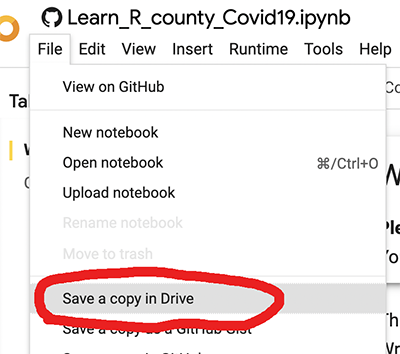



---



This is a short tutorial on using R to explore Covid19 data using Google CoLab <br>
Written by Hong Qin <br>
This version is modifed for a high-school coding bootcamp on Dec 19-23, 2020.

This is a work in progress and is for educational purpose only. 

This is code can be cloned from
https://github.com/hongqin/Use-R-in-CoLab/blob/master/Learn_R_UALR_CoLab.ipynb

More tutorials at http://YouTube.com/hongqin

# Prepartion 1. Get familiar with Google CoLab

## The 'Code' and 'Text' cells
The code cell can be run by click the play icon on the upper-left corner of the code cells.

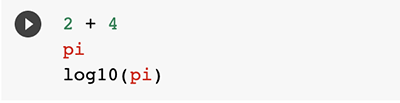

The menu on the top


## File, Edit, Insert, Runtime, Tools

## Table of contents and the left-sided panel

# Preparation 2. The COVID19 open data


A popular source for reporting COVID cases is the site built by researchers at the John Hopkins University (JHU). This JHU data set is publically available and will be used in our study. 

There are many other COVID19 data set, see
https://en.wikipedia.org/wiki/COVID-19_datasets


# Chapter 1. Basics of R coding

## What is R? 
It is a popular language for data analysis. See

https://en.wikipedia.org/wiki/R_(programming_language) 

There are many books on how to use R. This exercise is only meant to show some basics of R to you.

## Simple calculation

In [ ]:
2 + 4
pi
log10(pi)

In [ ]:
2*4
9/3
9-7

## Use variables

The = sign means assignment in R and many other programming languages.

In [ ]:
x = 2
y = 3
z = x  + 6
z

## The # sign means comments (not code)

In [ ]:
# This is a comment
x = 2 #This is also a comment

## A list of numbers is called a Vector in R

In [ ]:
a_vector = c(1, 3.14159, 5.0, -1, 10) # c( ) is the syntax for defining a vector 
a_vector

In [ ]:
b_vector= a_vector + c(2, 0.5, -5, 1, -10)
b_vector

## Vectors can be indexed. 


In [ ]:
a_vector = 4:20 #The colon sign is a symbol mean from 4 to 20
a_vector

In [ ]:
a_vector[1] #first element of the vector

In [ ]:
a_vector[5]

### **Question**: How to find the 9-th element? 

## Functions in R uses smooth parentheses

A function that generates a list of numbers from 4 to 100 with a step of 2

In [ ]:
seq(4, 100, 2) 

The function rnorm() generate random number based on Gaussian distribution

In [ ]:
x = rnorm(100) #generate 100 normal-distributed (Gaussain) random nubmers 
y = x + rnorm(100)*10 # y is a linear transformation of x with some Gaussain noise
m = lm( y ~ x)
plot( y ~ x)
abline(m, col='red')
summary(m)

## Looking for helps. 
This can be done by a question mark or help(). 

In [ ]:
?rnorm

In [ ]:
?lm

In [ ]:
?abline

In [ ]:
help(seq)

## Load Libraries
Libraries are software tools developed by many people around the world.

In [ ]:
library(tidyverse)
library(dplyr)

## Dataframe - the spreadsheet in R
Dataframe is a basic tool to handle data in R, in some ways like a spreadsheet in Microsoft Excel.

Now, let's load a small demo spreadsheet from a website

In [ ]:
tb = read_csv("https://raw.githubusercontent.com/hongqin/Use-R-in-CoLab/master/vip-grades.csv")

In [ ]:
tb #look at the small table. Not a good idea for large table

In [ ]:
head(tb) #look at just a few row of the table

### pick rows and columns using indices

In [ ]:
tb[1,] #first row

In [ ]:
tb[, 2] #second column

In [ ]:
tb[c(1,5,9), 1:2] # the 1st, 5th, and 9th rows, two columns

In [ ]:
tb

### Pick a colum with $ or index

In [ ]:
tb$Grade

In [ ]:
tb[, 2]

### Pick a row 

In [ ]:
tb[1,]

### use fancy tidyverse

In [ ]:
tb %>% dplyr::select( name, GPA )  %>% filter (GPA >= 3.0)

In [ ]:
tb %>% select( College) %>% distinct

In [ ]:
tb %>% filter (College == "ArtsScience")


In [ ]:
tb %>% filter (College == "Engineering")

### Question: Are GPA different between VIP students in Egnineering versus Art and Science? 

We can do a t-test. 

In [ ]:
tbEng = tb %>% filter (College == "Engineering") 
tbAS = tb %>% filter (College == "ArtsScience")
t.test( tbEng$GPA, tbAS$GPA) # a t-test

Generally, a p-value larger than 0.05 means no significant difference in the statistical sense. 

For more information on p-value, see 
https://en.wikipedia.org/wiki/P-value

# Chapter 2, Explore the USA county-level COVID19 case data


We will go through the COVID19 case data set and learn more R on the way. 



First, install and load some necessary packages

In [64]:
install.packages('reshape2')
library(tidyverse)
library(lubridate)
library(reshape2)
library(ggplot2)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




## Load the COVID19 data into a dataframe

In [65]:
# load JHU covid19 data set with tidyverse read_csv
# this is the URL for "view raw " for csv files on GitHub
tb = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  iso2 = col_character(),
  iso3 = col_character(),
  Admin2 = col_character(),
  Province_State = col_character(),
  Country_Region = col_character(),
  Combined_Key = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [66]:
head(tb)

UID      iso2 iso3 code3 FIPS Admin2  Province_State Country_Region Lat     
1 84001001 US   USA  840   1001 Autauga Alabama        US             32.53953
2 84001003 US   USA  840   1003 Baldwin Alabama        US             30.72775
3 84001005 US   USA  840   1005 Barbour Alabama        US             31.86826
4 84001007 US   USA  840   1007 Bibb    Alabama        US             32.99642
5 84001009 US   USA  840   1009 Blount  Alabama        US             33.98211
6 84001011 US   USA  840   1011 Bullock Alabama        US             32.10031
  Long_     ⋯ 12/6/20 12/7/20 12/8/20 12/9/20 12/10/20 12/11/20 12/12/20
1 -86.64408 ⋯ 3005    3043    3087     3117    3186     3233     3258   
2 -87.72207 ⋯ 9728    9821    9974    10087   10288    10489    10665   
3 -85.38713 ⋯ 1223    1224    1240     1245    1258     1264     1269   
4 -87.12511 ⋯ 1293    1299    1317     1322    1359     1398     1417   
5 -86.56791 ⋯ 3299    3324    3426     3496    3600     3663     3744   
6 -85.71266 ⋯  713     714     719      722     722      723      725   
  12/13/20 12/14/20 12/15/20
1  3300     3329     3426   
2 10806    10898    11061   
3  1272     1275     1292   
4  1441     1455     1504   
5  3776     3803     3881   
6   728      728      733

## Pick rows, columns, and cells in DataFrames

A a_ij


In [67]:
# pick first row, second colum
tb[1,2] 

# pick 4th row, 5th colum. Notice that R starts with 1, not zero like Python
tb[4, 5]

iso2
1 US

FIPS
1 1007

In [68]:
# pick first column and  first 10 rows
tb[ 1:10, 1]

UID     
1  84001001
2  84001003
3  84001005
4  84001007
5  84001009
6  84001011
7  84001013
8  84001015
9  84001017
10 84001019

In [69]:
# pick 6-7th rows, 4-8 colums
tb[ 6:7, 4:8]

code3 FIPS Admin2  Province_State Country_Region
1 840   1011 Bullock Alabama        US            
2 840   1013 Butler  Alabama        US

In [70]:
# The daily cases data started on the 12th column
tb[ 1:5, 1:12]

UID      iso2 iso3 code3 FIPS Admin2  Province_State Country_Region Lat     
1 84001001 US   USA  840   1001 Autauga Alabama        US             32.53953
2 84001003 US   USA  840   1003 Baldwin Alabama        US             30.72775
3 84001005 US   USA  840   1005 Barbour Alabama        US             31.86826
4 84001007 US   USA  840   1007 Bibb    Alabama        US             32.99642
5 84001009 US   USA  840   1009 Blount  Alabama        US             33.98211
  Long_     Combined_Key         1/22/20
1 -86.64408 Autauga, Alabama, US 0      
2 -87.72207 Baldwin, Alabama, US 0      
3 -85.38713 Barbour, Alabama, US 0      
4 -87.12511 Bibb, Alabama, US    0      
5 -86.56791 Blount, Alabama, US  0

In [71]:
?length

In [72]:
# how many columns? 
length(tb[1,])
print(paste( "There are ", length(tb[1,]), " columns"))

[1] 340

[1] "There are  340  columns"


In [73]:
# view the first 5 rows in all data columns
tb[1:5 , 12: length(tb[1,])  ]

1/22/20 1/23/20 1/24/20 1/25/20 1/26/20 1/27/20 1/28/20 1/29/20 1/30/20
1 0       0       0       0       0       0       0       0       0      
2 0       0       0       0       0       0       0       0       0      
3 0       0       0       0       0       0       0       0       0      
4 0       0       0       0       0       0       0       0       0      
5 0       0       0       0       0       0       0       0       0      
  1/31/20 ⋯ 12/6/20 12/7/20 12/8/20 12/9/20 12/10/20 12/11/20 12/12/20 12/13/20
1 0       ⋯ 3005    3043    3087     3117    3186     3233     3258     3300   
2 0       ⋯ 9728    9821    9974    10087   10288    10489    10665    10806   
3 0       ⋯ 1223    1224    1240     1245    1258     1264     1269     1272   
4 0       ⋯ 1293    1299    1317     1322    1359     1398     1417     1441   
5 0       ⋯ 3299    3324    3426     3496    3600     3663     3744     3776   
  12/14/20 12/15/20
1  3329     3426   
2 10898    11061   
3  1275     1292   
4  1455     1504   
5  3803     3881

## Select columns of daily cases

select the all columns of actual data, from the 12 th column to the last column.

In [74]:
tb %>% dplyr::select( 12:length(tb[1,]) ) #It seems that CoLab often rquire explicit pakcage for function calls. 

1/22/20 1/23/20 1/24/20 1/25/20 1/26/20 1/27/20 1/28/20 1/29/20 1/30/20
1    0       0       0       0       0       0       0       0       0      
2    0       0       0       0       0       0       0       0       0      
3    0       0       0       0       0       0       0       0       0      
4    0       0       0       0       0       0       0       0       0      
5    0       0       0       0       0       0       0       0       0      
6    0       0       0       0       0       0       0       0       0      
7    0       0       0       0       0       0       0       0       0      
8    0       0       0       0       0       0       0       0       0      
9    0       0       0       0       0       0       0       0       0      
10   0       0       0       0       0       0       0       0       0      
11   0       0       0       0       0       0       0       0       0      
12   0       0       0       0       0       0       0       0       0      
13   0       0       0       0       0       0       0       0       0      
14   0       0       0       0       0       0       0       0       0      
15   0       0       0       0       0       0       0       0       0      
16   0       0       0       0       0       0       0       0       0      
17   0       0       0       0       0       0       0       0       0      
18   0       0       0       0       0       0       0       0       0      
19   0       0       0       0       0       0       0       0       0      
20   0       0       0       0       0       0       0       0       0      
21   0       0       0       0       0       0       0       0       0      
22   0       0       0       0       0       0       0       0       0      
23   0       0       0       0       0       0       0       0       0      
24   0       0       0       0       0       0       0       0       0      
25   0       0       0       0       0       0       0       0       0      
26   0       0       0       0       0       0       0       0       0      
27   0       0       0       0       0       0       0       0       0      
28   0       0       0       0       0       0       0       0       0      
29   0       0       0       0       0       0       0       0       0      
30   0       0       0       0       0       0       0       0       0      
⋮    ⋮       ⋮       ⋮       ⋮       ⋮       ⋮       ⋮       ⋮       ⋮      
3311 0       0       0       0       0       0       0       0       0      
3312 0       0       0       0       0       0       0       0       0      
3313 0       0       0       0       0       0       0       0       0      
3314 0       0       0       0       0       0       0       0       0      
3315 0       0       0       0       0       0       0       0       0      
3316 0       0       0       0       0       0       0       0       0      
3317 0       0       0       0       0       0       0       0       0      
3318 0       0       0       0       0       0       0       0       0      
3319 0       0       0       0       0       0       0       0       0      
3320 0       0       0       0       0       0       0       0       0      
3321 0       0       0       0       0       0       0       0       0      
3322 0       0       0       0       0       0       0       0       0      
3323 0       0       0       0       0       0       0       0       0      
3324 0       0       0       0       0       0       0       0       0      
3325 0       0       0       0       0       0       0       0       0      
3326 0       0       0       0       0       0       0       0       0      
3327 0       0       0       0       0       0       0       0       0      
3328 0       0       0       0       0       0       0       0       0      
3329 0       0       0       0       0       0       0       0       0      
3330 0       0       0       0       0       0       0       0       0      
3

## Rotate the data so that data of each county is in one column

In [75]:
# We need save the data into a new variable 'tb1' so that computer can remember it
tb1 <- tb %>% dplyr::select(12:length(tb[1,])) %>% as.matrix()
tb1 = as.data.frame(t(tb1)) # t for transpose, then convert to a dataframe
tail(tb1)

V1   V2    V3   V4   V5   V6  V7   V8   V9   V10  ⋯ V3331 V3332 V3333
12/10/20 3186 10288 1258 1359 3600 722 1287 7534 1977 1149 ⋯ 1574  373   2267 
12/11/20 3233 10489 1264 1398 3663 723 1289 7658 1982 1167 ⋯ 1595  378   2290 
12/12/20 3258 10665 1269 1417 3744 725 1306 7760 1997 1187 ⋯ 1600  381   2293 
12/13/20 3300 10806 1272 1441 3776 728 1330 7813 2013 1197 ⋯ 1636  390   2323 
12/14/20 3329 10898 1275 1455 3803 728 1340 7872 2022 1204 ⋯ 1654  392   2345 
12/15/20 3426 11061 1292 1504 3881 733 1332 7966 2040 1213 ⋯ 1671  393   2350 
         V3334 V3335 V3336 V3337 V3338 V3339 V3340
12/10/20 534   2281  1852  1271  0     596   428  
12/11/20 536   2376  1868  1281  0     620   428  
12/12/20 539   2384  1886  1289  0     629   428  
12/13/20 540   2451  1905  1307  0     639   428  
12/14/20 544   2518  1930  1327  0     644   429  
12/15/20 548   2544  1940  1352  0     659   436

## Add meaning columns names

The Combined_Key are useful column names

In [76]:
names(tb1) = tb$Combined_Key
#tail(tb1[100:110,1:10])
tail(tb1[,1:10])


Autauga, Alabama, US Baldwin, Alabama, US Barbour, Alabama, US
12/10/20 3186                 10288                1258                
12/11/20 3233                 10489                1264                
12/12/20 3258                 10665                1269                
12/13/20 3300                 10806                1272                
12/14/20 3329                 10898                1275                
12/15/20 3426                 11061                1292                
         Bibb, Alabama, US Blount, Alabama, US Bullock, Alabama, US
12/10/20 1359              3600                722                 
12/11/20 1398              3663                723                 
12/12/20 1417              3744                725                 
12/13/20 1441              3776                728                 
12/14/20 1455              3803                728                 
12/15/20 1504              3881                733                 
         Butler, Alabama, US Calhoun, Alabama, US Chambers, Alabama, US
12/10/20 1287                7534                 1977                 
12/11/20 1289                7658                 1982                 
12/12/20 1306                7760                 1997                 
12/13/20 1330                7813                 2013                 
12/14/20 1340                7872                 2022                 
12/15/20 1332                7966                 2040                 
         Cherokee, Alabama, US
12/10/20 1149                 
12/11/20 1167                 
12/12/20 1187                 
12/13/20 1197                 
12/14/20 1204                 
12/15/20 1213

## Convert dates from text format to actual Date type

see https://lubridate.tidyverse.org/ 

In [77]:
library(lubridate)
date("10/1/2020")

[1] "10-01-20"

In [78]:
current_dates = names(tb)[12:length(tb[1,])]
class(current_dates)
current_dates

[1] "character"

[1] "1/22/20"  "1/23/20"  "1/24/20"  "1/25/20"  "1/26/20"  "1/27/20" 
  [7] "1/28/20"  "1/29/20"  "1/30/20"  "1/31/20"  "2/1/20"   "2/2/20"  
 [13] "2/3/20"   "2/4/20"   "2/5/20"   "2/6/20"   "2/7/20"   "2/8/20"  
 [19] "2/9/20"   "2/10/20"  "2/11/20"  "2/12/20"  "2/13/20"  "2/14/20" 
 [25] "2/15/20"  "2/16/20"  "2/17/20"  "2/18/20"  "2/19/20"  "2/20/20" 
 [31] "2/21/20"  "2/22/20"  "2/23/20"  "2/24/20"  "2/25/20"  "2/26/20" 
 [37] "2/27/20"  "2/28/20"  "2/29/20"  "3/1/20"   "3/2/20"   "3/3/20"  
 [43] "3/4/20"   "3/5/20"   "3/6/20"   "3/7/20"   "3/8/20"   "3/9/20"  
 [49] "3/10/20"  "3/11/20"  "3/12/20"  "3/13/20"  "3/14/20"  "3/15/20" 
 [55] "3/16/20"  "3/17/20"  "3/18/20"  "3/19/20"  "3/20/20"  "3/21/20" 
 [61] "3/22/20"  "3/23/20"  "3/24/20"  "3/25/20"  "3/26/20"  "3/27/20" 
 [67] "3/28/20"  "3/29/20"  "3/30/20"  "3/31/20"  "4/1/20"   "4/2/20"  
 [73] "4/3/20"   "4/4/20"   "4/5/20"   "4/6/20"   "4/7/20"   "4/8/20"  
 [79] "4/9/20"   "4/10/20"  "4/11/20"  "4/12/20"  "4/13/20"  "4/14/20" 
 [85] "4/15/20"  "4/16/20"  "4/17/20"  "4/18/20"  "4/19/20"  "4/20/20" 
 [91] "4/21/20"  "4/22/20"  "4/23/20"  "4/24/20"  "4/25/20"  "4/26/20" 
 [97] "4/27/20"  "4/28/20"  "4/29/20"  "4/30/20"  "5/1/20"   "5/2/20"  
[103] "5/3/20"   "5/4/20"   "5/5/20"   "5/6/20"   "5/7/20"   "5/8/20"  
[109] "5/9/20"   "5/10/20"  "5/11/20"  "5/12/20"  "5/13/20"  "5/14/20" 
[115] "5/15/20"  "5/16/20"  "5/17/20"  "5/18/20"  "5/19/20"  "5/20/20" 
[121] "5/21/20"  "5/22/20"  "5/23/20"  "5/24/20"  "5/25/20"  "5/26/20" 
[127] "5/27/20"  "5/28/20"  "5/29/20"  "5/30/20"  "5/31/20"  "6/1/20"  
[133] "6/2/20"   "6/3/20"   "6/4/20"   "6/5/20"   "6/6/20"   "6/7/20"  
[139] "6/8/20"   "6/9/20"   "6/10/20"  "6/11/20"  "6/12/20"  "6/13/20" 
[145] "6/14/20"  "6/15/20"  "6/16/20"  "6/17/20"  "6/18/20"  "6/19/20" 
[151] "6/20/20"  "6/21/20"  "6/22/20"  "6/23/20"  "6/24/20"  "6/25/20" 
[157] "6/26/20"  "6/27/20"  "6/28/20"  "6/29/20"  "6/30/20"  "7/1/20"  
[163] "7/2/20"   "7/3/20"   "7/4/20"   "7/5/20"   "7/6/20"   "7/7/20"  
[169] "7/8/20"   "7/9/20"   "7/10/20"  "7/11/20"  "7/12/20"  "7/13/20" 
[175] "7/14/20"  "7/15/20"  "7/16/20"  "7/17/20"  "7/18/20"  "7/19/20" 
[181] "7/20/20"  "7/21/20"  "7/22/20"  "7/23/20"  "7/24/20"  "7/25/20" 
[187] "7/26/20"  "7/27/20"  "7/28/20"  "7/29/20"  "7/30/20"  "7/31/20" 
[193] "8/1/20"   "8/2/20"   "8/3/20"   "8/4/20"   "8/5/20"   "8/6/20"  
[199] "8/7/20"   "8/8/20"   "8/9/20"   "8/10/20"  "8/11/20"  "8/12/20" 
[205] "8/13/20"  "8/14/20"  "8/15/20"  "8/16/20"  "8/17/20"  "8/18/20" 
[211] "8/19/20"  "8/20/20"  "8/21/20"  "8/22/20"  "8/23/20"  "8/24/20" 
[217] "8/25/20"  "8/26/20"  "8/27/20"  "8/28/20"  "8/29/20"  "8/30/20" 
[223] "8/31/20"  "9/1/20"   "9/2/20"   "9/3/20"   "9/4/20"   "9/5/20"  
[229] "9/6/20"   "9/7/20"   "9/8/20"   "9/9/20"   "9/10/20"  "9/11/20" 
[235] "9/12/20"  "9/13/20"  "9/14/20"  "9/15/20"  "9/16/20"  "9/17/20" 
[241] "9/18/20"  "9/19/20"  "9/20/20"  "9/21/20"  "9/22/20"  "9/23/20" 
[247] "9/24/20"  "9/25/20"  "9/26/20"  "9/27/20"  "9/28/20"  "9/29/20" 
[253] "9/30/20"  "10/1/20"  "10/2/20"  "10/3/20"  "10/4/20"  "10/5/20" 
[259] "10/6/20"  "10/7/20"  "10/8/20"  "10/9/20"  "10/10/20" "10/11/20"
[265] "10/12/20" "10/13/20" "10/14/20" "10/15/20" "10/16/20" "10/17/20"
[271] "10/18/20" "10/19/20" "10/20/20" "10/21/20" "10/22/20" "10/23/20"
[277] "10/24/20" "10/25/20" "10/26/20" "10/27/20" "10/28/20" "10/29/20"
[283] "10/30/20" "10/31/20" "11/1/20"  "11/2/20"  "11/3/20"  "11/4/20" 
[289] "11/5/20"  "11/6/20"  "11/7/20"  "11/8/20"  "11/9/20"  "11/10/20"
[295] "11/11/20" "11/12/20" "11/13/20" "11/14/20" "11/15/20" "11/16/20"
[301] "11/17/20" "11/18/20" "11/19/20" "11/20/20" "11/21/20" "11/22/20"
[307] "11/23/20" "11/24/20" "11/25/20" "11/26/20" "11/27/20" "11/28/20"
[313] "11/29/20" "11/30/20" "12/1/20"  "12/2/20"  "12/3/20"  "12/4/20" 
[319] "12/5/20"  "12/6/20"  "12/7/20"  "12/8/20"  "12/9/20"  "12/10/20"
[325] "12/11/20" "12/12/20" "12/13/20" "12/14/20" "12/15/20"

In [79]:
mdy(current_dates[1:10])

[1] "2020-01-22" "2020-01-23" "2020-01-24" "2020-01-25" "2020-01-26"
 [6] "2020-01-27" "2020-01-28" "2020-01-29" "2020-01-30" "2020-01-31"

In [80]:
tb1$dates = mdy(current_dates)
tail(tb1)

Autauga, Alabama, US Baldwin, Alabama, US Barbour, Alabama, US
12/10/20 3186                 10288                1258                
12/11/20 3233                 10489                1264                
12/12/20 3258                 10665                1269                
12/13/20 3300                 10806                1272                
12/14/20 3329                 10898                1275                
12/15/20 3426                 11061                1292                
         Bibb, Alabama, US Blount, Alabama, US Bullock, Alabama, US
12/10/20 1359              3600                722                 
12/11/20 1398              3663                723                 
12/12/20 1417              3744                725                 
12/13/20 1441              3776                728                 
12/14/20 1455              3803                728                 
12/15/20 1504              3881                733                 
         Butler, Alabama, US Calhoun, Alabama, US Chambers, Alabama, US
12/10/20 1287                7534                 1977                 
12/11/20 1289                7658                 1982                 
12/12/20 1306                7760                 1997                 
12/13/20 1330                7813                 2013                 
12/14/20 1340                7872                 2022                 
12/15/20 1332                7966                 2040                 
         Cherokee, Alabama, US ⋯ Platte, Wyoming, US Sheridan, Wyoming, US
12/10/20 1149                  ⋯ 373                 2267                 
12/11/20 1167                  ⋯ 378                 2290                 
12/12/20 1187                  ⋯ 381                 2293                 
12/13/20 1197                  ⋯ 390                 2323                 
12/14/20 1204                  ⋯ 392                 2345                 
12/15/20 1213                  ⋯ 393                 2350                 
         Sublette, Wyoming, US Sweetwater, Wyoming, US Teton, Wyoming, US
12/10/20 534                   2281                    1852              
12/11/20 536                   2376                    1868              
12/12/20 539                   2384                    1886              
12/13/20 540                   2451                    1905              
12/14/20 544                   2518                    1930              
12/15/20 548                   2544                    1940              
         Uinta, Wyoming, US Unassigned, Wyoming, US Washakie, Wyoming, US
12/10/20 1271               0                       596                  
12/11/20 1281               0                       620                  
12/12/20 1289               0                       629                  
12/13/20 1307               0                       639                  
12/14/20 1327               0                       644                  
12/15/20 1352               0                       659                  
         Weston, Wyoming, US dates     
12/10/20 428                 2020-12-10
12/11/20 428                 2020-12-11
12/12/20 428                 2020-12-12
12/13/20 428                 2020-12-13
12/14/20 429                 2020-12-14
12/15/20 436                 2020-12-15

## Select a time window (row window) using 'filter'

In [81]:
tb1 %>% filter( dates > mdy("4/30/2020"), dates < mdy("5/31/20")) %>% head()

Autauga, Alabama, US Baldwin, Alabama, US Barbour, Alabama, US
5/1/20 43                   180                  42                  
5/2/20 47                   185                  43                  
5/3/20 51                   190                  45                  
5/4/20 54                   190                  45                  
5/5/20 54                   194                  47                  
5/6/20 56                   199                  47                  
       Bibb, Alabama, US Blount, Alabama, US Bullock, Alabama, US
5/1/20 41                41                  14                  
5/2/20 41                42                  14                  
5/3/20 42                42                  14                  
5/4/20 43                42                  15                  
5/5/20 43                42                  17                  
5/6/20 43                44                  17                  
       Butler, Alabama, US Calhoun, Alabama, US Chambers, Alabama, US
5/1/20  68                  97                  295                  
5/2/20  93                 102                  296                  
5/3/20 104                 109                  302                  
5/4/20 113                 109                  307                  
5/5/20 118                 118                  309                  
5/6/20 128                 120                  313                  
       Cherokee, Alabama, US ⋯ Platte, Wyoming, US Sheridan, Wyoming, US
5/1/20 16                    ⋯ 0                   16                   
5/2/20 16                    ⋯ 0                   16                   
5/3/20 19                    ⋯ 0                   16                   
5/4/20 19                    ⋯ 0                   16                   
5/5/20 19                    ⋯ 0                   16                   
5/6/20 20                    ⋯ 0                   16                   
       Sublette, Wyoming, US Sweetwater, Wyoming, US Teton, Wyoming, US
5/1/20 3                     18                      96                
5/2/20 3                     18                      97                
5/3/20 3                     18                      98                
5/4/20 3                     18                      98                
5/5/20 3                     18                      98                
5/6/20 3                     19                      98                
       Uinta, Wyoming, US Unassigned, Wyoming, US Washakie, Wyoming, US
5/1/20 8                  0                       8                    
5/2/20 8                  0                       8                    
5/3/20 8                  0                       8                    
5/4/20 8                  0                       8                    
5/5/20 8                  0                       8                    
5/6/20 8                  0                       8                    
       Weston, Wyoming, US dates     
5/1/20 0                   2020-05-01
5/2/20 0                   2020-05-02
5/3/20 0                   2020-05-03
5/4/20 0                   2020-05-04
5/5/20 0                   2020-05-05
5/6/20 0                   2020-05-06

In [82]:
start = mdy("9/14/20")
start + ddays(13)

[1] "2020-09-27"

In [83]:
tb1 %>% dplyr::filter( dates >= start, dates <=  start + ddays(13)) %>% dplyr::select(1:5)

Autauga, Alabama, US Baldwin, Alabama, US Barbour, Alabama, US
9/14/20 1586                 4949                 801                 
9/15/20 1601                 4964                 807                 
9/16/20 1614                 4982                 807                 
9/17/20 1650                 4994                 822                 
9/18/20 1659                 5016                 825                 
9/19/20 1675                 5029                 831                 
9/20/20 1676                 5053                 833                 
9/21/20 1697                 5090                 846                 
9/22/20 1697                 5106                 848                 
9/23/20 1711                 5127                 852                 
9/24/20 1736                 5397                 868                 
9/25/20 1750                 5419                 878                 
9/26/20 1758                 5465                 882                 
9/27/20 1770                 5524                 883                 
        Bibb, Alabama, US Blount, Alabama, US
9/14/20 600               1490               
9/15/20 601               1504               
9/16/20 606               1515               
9/17/20 607               1538               
9/18/20 619               1551               
9/19/20 623               1564               
9/20/20 624               1573               
9/21/20 628               1586               
9/22/20 633               1593               
9/23/20 637               1605               
9/24/20 646               1614               
9/25/20 649               1619               
9/26/20 650               1623               
9/27/20 651               1624

## Plot a time window

In [84]:
start = mdy("9/16/20")
start + ddays(14)

tb_sub <- 
 tb1 %>% dplyr::filter( dates >= start, dates <  start + ddays(14)) %>% dplyr::select( c(1:5), dates)

tb_sub

[1] "2020-09-30"

Autauga, Alabama, US Baldwin, Alabama, US Barbour, Alabama, US
9/16/20 1614                 4982                 807                 
9/17/20 1650                 4994                 822                 
9/18/20 1659                 5016                 825                 
9/19/20 1675                 5029                 831                 
9/20/20 1676                 5053                 833                 
9/21/20 1697                 5090                 846                 
9/22/20 1697                 5106                 848                 
9/23/20 1711                 5127                 852                 
9/24/20 1736                 5397                 868                 
9/25/20 1750                 5419                 878                 
9/26/20 1758                 5465                 882                 
9/27/20 1770                 5524                 883                 
9/28/20 1776                 5550                 883                 
9/29/20 1785                 5592                 892                 
        Bibb, Alabama, US Blount, Alabama, US dates     
9/16/20 606               1515                2020-09-16
9/17/20 607               1538                2020-09-17
9/18/20 619               1551                2020-09-18
9/19/20 623               1564                2020-09-19
9/20/20 624               1573                2020-09-20
9/21/20 628               1586                2020-09-21
9/22/20 633               1593                2020-09-22
9/23/20 637               1605                2020-09-23
9/24/20 646               1614                2020-09-24
9/25/20 649               1619                2020-09-25
9/26/20 650               1623                2020-09-26
9/27/20 651               1624                2020-09-27
9/28/20 653               1626                2020-09-28
9/29/20 660               1633                2020-09-29

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



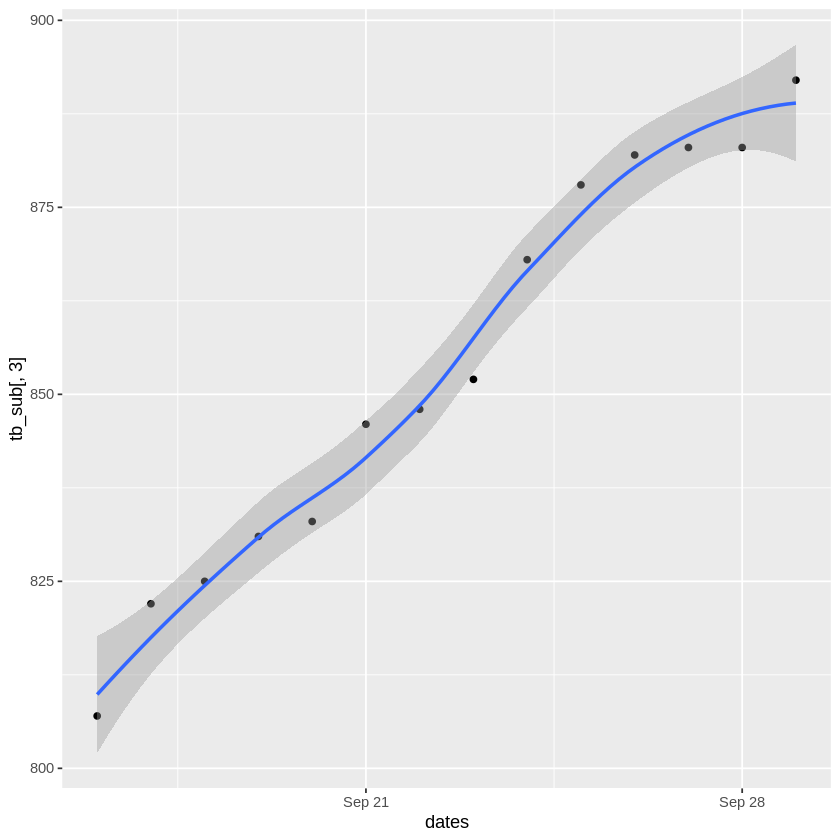

In [85]:
ggplot(tb_sub, aes( x = dates, y=tb_sub[,3])) + geom_point() + geom_smooth()

# Chapter 3, Let's look a specific county. 
How about Hamilton, TN? This is the county where Chattanooga, TN is located.


### Define the specific county

In [86]:
mycountyname = 'Hamilton'
myState = 'Tennessee'
countyStateUSA = 'Hamilton, Tennessee, US'

In [87]:
print(paste("There are ", length(names(tb1)[ grep( mycountyname, colnames(tb1))] ), mycountyname, "counties in the USA"))

[1] "There are  10 Hamilton counties in the USA"


In [88]:
head(tb1)

Autauga, Alabama, US Baldwin, Alabama, US Barbour, Alabama, US
1/22/20 0                    0                    0                   
1/23/20 0                    0                    0                   
1/24/20 0                    0                    0                   
1/25/20 0                    0                    0                   
1/26/20 0                    0                    0                   
1/27/20 0                    0                    0                   
        Bibb, Alabama, US Blount, Alabama, US Bullock, Alabama, US
1/22/20 0                 0                   0                   
1/23/20 0                 0                   0                   
1/24/20 0                 0                   0                   
1/25/20 0                 0                   0                   
1/26/20 0                 0                   0                   
1/27/20 0                 0                   0                   
        Butler, Alabama, US Calhoun, Alabama, US Chambers, Alabama, US
1/22/20 0                   0                    0                    
1/23/20 0                   0                    0                    
1/24/20 0                   0                    0                    
1/25/20 0                   0                    0                    
1/26/20 0                   0                    0                    
1/27/20 0                   0                    0                    
        Cherokee, Alabama, US ⋯ Platte, Wyoming, US Sheridan, Wyoming, US
1/22/20 0                     ⋯ 0                   0                    
1/23/20 0                     ⋯ 0                   0                    
1/24/20 0                     ⋯ 0                   0                    
1/25/20 0                     ⋯ 0                   0                    
1/26/20 0                     ⋯ 0                   0                    
1/27/20 0                     ⋯ 0                   0                    
        Sublette, Wyoming, US Sweetwater, Wyoming, US Teton, Wyoming, US
1/22/20 0                     0                       0                 
1/23/20 0                     0                       0                 
1/24/20 0                     0                       0                 
1/25/20 0                     0                       0                 
1/26/20 0                     0                       0                 
1/27/20 0                     0                       0                 
        Uinta, Wyoming, US Unassigned, Wyoming, US Washakie, Wyoming, US
1/22/20 0                  0                       0                    
1/23/20 0                  0                       0                    
1/24/20 0                  0                       0                    
1/25/20 0                  0                       0                    
1/26/20 0                  0                       0                    
1/27/20 0                  0                       0                    
        Weston, Wyoming, US dates     
1/22/20 0                   2020-01-22
1/23/20 0                   2020-01-23
1/24/20 0                   2020-01-24
1/25/20 0                   2020-01-25
1/26/20 0                   2020-01-26
1/27/20 0                   2020-01-27

In [89]:
tb_mycounty <-  tb1 %>% 
   dplyr::select ( countyStateUSA, dates)

head(tb_mycounty)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(countyStateUSA)` instead of `countyStateUSA` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



Hamilton, Tennessee, US dates     
1/22/20 0                       2020-01-22
1/23/20 0                       2020-01-23
1/24/20 0                       2020-01-24
1/25/20 0                       2020-01-25
1/26/20 0                       2020-01-26
1/27/20 0                       2020-01-27

In [90]:
tb_mycounty <- tb_mycounty %>%
   dplyr::filter( between(dates, mdy('4/1/20'), mdy('10/20/20')))
head(tb_mycounty)

Hamilton, Tennessee, US dates     
4/1/20 50                      2020-04-01
4/2/20 61                      2020-04-02
4/3/20 67                      2020-04-03
4/4/20 71                      2020-04-04
4/5/20 74                      2020-04-05
4/6/20 83                      2020-04-06

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



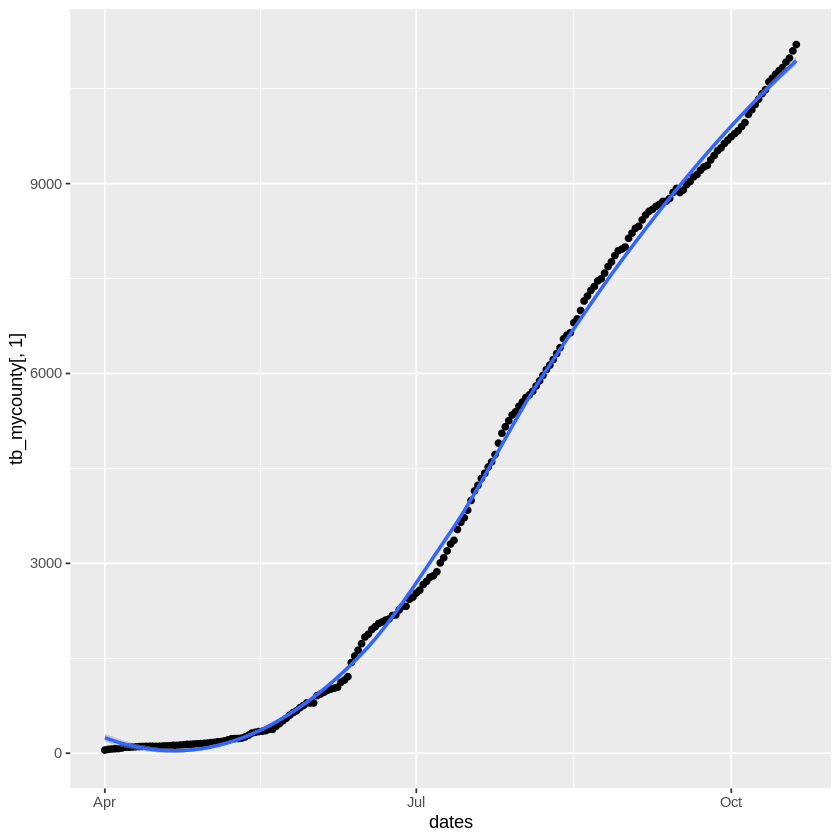

In [91]:
ggplot(tb_mycounty, aes( x = dates, y=tb_mycounty[,1])) + geom_point() + geom_smooth()

# Chapter 4. Look at daily cases

   ## Read the cumulative cases again

In [92]:
tb = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))

tb1 <- tb %>% dplyr::select(12:length(tb[1,])) %>% as.matrix()
tb1 = as.data.frame(t(tb1))

names(tb1) = tb$Combined_Key

current_dates = names(tb)[12:length(tb[1,])]
tb1$dates = mdy(current_dates)
#head(tb1)

#mycounties = c( 'Hamilton, Tennessee, US', 'Davidson, Tennessee, US')
mycounties = c( 'Hamilton, Tennessee, US')

days_window = 300  # time  window
endday = today(tzone ='EST')

tb_sub <- tb1 %>% 
  dplyr::select( all_of(mycounties), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

head(tb_sub)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  iso2 = col_character(),
  iso3 = col_character(),
  Admin2 = col_character(),
  Province_State = col_character(),
  Country_Region = col_character(),
  Combined_Key = col_character()
)
ℹ Use `spec()` for the full column specifications.




Hamilton, Tennessee, US dates     
2/20/20 0                       2020-02-20
2/21/20 0                       2020-02-21
2/22/20 0                       2020-02-22
2/23/20 0                       2020-02-23
2/24/20 0                       2020-02-24
2/25/20 0                       2020-02-25

## Covert cumulative counts into daily cases

The diff function is helpful here. 

### Question: How do we find out the help page for diff()? 

In [93]:
tb_sub[,1]

[1]     0     0     0     0     0     0     0     0     0     0     0     0
 [13]     0     0     0     0     0     0     0     0     0     0     1     1
 [25]     1     1     1     3     5     5     7     8    12     8    26    30
 [37]    30    35    35    35    50    50    61    67    71    74    83    95
 [49]    95    98   102   105   107   109   110   110   109   110   114   116
 [61]   118   124   124   129   133   140   141   146   149   152   156   160
 [73]   168   172   180   184   196   211   229   232   233   240   258   286
 [85]   319   332   342   347   357   377   377   425   468   511   552   601
 [97]   642   670   719   753   794   794   794   910   935   964   992  1013
[109]  1028  1042  1122  1156  1210  1433  1536  1628  1731  1836  1881  1956
[121]  2000  2050  2074  2103  2120  2176  2185  2264  2321  2321  2433  2466
[133]  2532  2577  2665  2716  2781  2804  2867  3007  3088  3196  3305  3364
[145]  3535  3648  3721  3840  3994  4144  4233  4341  4424  4523  4604  4720
[157]  4900  5055  5158  5253  5344  5395  5483  5549  5621  5661  5720  5803
[169]  5884  5970  6062  6132  6220  6315  6408  6547  6605  6644  6801  6862
[181]  6995  7145  7223  7312  7373  7463  7496  7586  7689  7763  7863  7939
[193]  7965  7998  8136  8217  8294  8326  8427  8505  8563  8594  8640  8672
[205]  8718  8722  8765  8860  8924  8859  8899  8985  9033  9106  9144  9211
[217]  9263  9287  9374  9443  9519  9564  9634  9687  9741  9789  9835  9900
[229]  9964 10094 10166 10250 10334 10421 10483 10608 10666 10730 10785 10834
[241] 10918 10983 11097 11197 11289 11368 11497 11618 11758 11867 11952 12057
[253] 12175 12251 12300 12313 12395 12532 12652 12719 12818 13036 13191 13404
[265] 13551 13715 13866 13963 14202 14437 14797 14919 15066 15246 15382 15557
[277] 15723 15861 15944 16137 16369 16555 16701 16861 17311 17549 17857 18210
[289] 18414 18656 18824 19107 19417 19729 20052 20322 20664 21119 21535 21969

In [94]:
local_dailycases = c(0, diff( tb_sub[,1] ))
str(x)

 num [1:100] -0.0248 -0.3007 0.8423 1.012 -1.0578 ...


In [95]:
tb_daily_sub = data.frame( local_dailycases )
head(tb_daily_sub)

local_dailycases
1 0               
2 0               
3 0               
4 0               
5 0               
6 0

In [96]:
tb_daily_sub$YMD = mdy(row.names(tb_sub))
head(tb_daily_sub)

local_dailycases YMD       
1 0                2020-02-20
2 0                2020-02-21
3 0                2020-02-22
4 0                2020-02-23
5 0                2020-02-24
6 0                2020-02-25

In [97]:
row.names(tb_daily_sub) = tb_daily_sub$YMD

In [98]:
names(tb_daily_sub)[1] = mycounties

In [99]:
tail(tb_daily_sub)

Hamilton, Tennessee, US YMD       
2020-12-10 323                     2020-12-10
2020-12-11 270                     2020-12-11
2020-12-12 342                     2020-12-12
2020-12-13 455                     2020-12-13
2020-12-14 416                     2020-12-14
2020-12-15 434                     2020-12-15

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



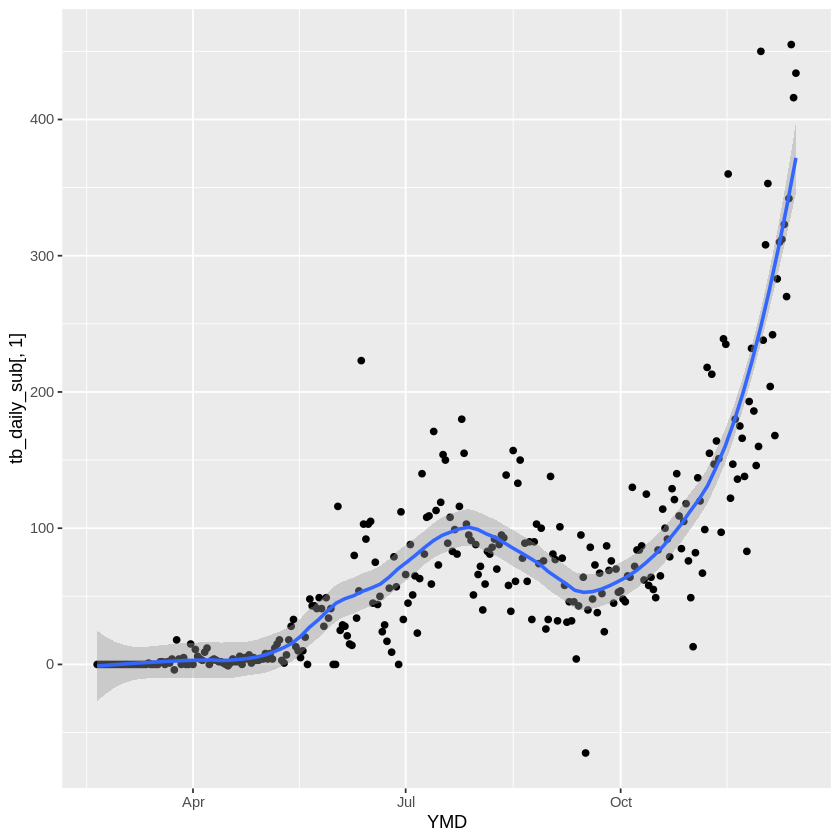

In [100]:
myplot <- ggplot(tb_daily_sub, aes(x=YMD, y=tb_daily_sub[,1]))
myplot + geom_point() + stat_smooth(span=0.3)

# Chapter 5. Google Mobility analysis


## Regional mobility

In [101]:
system("wget https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip")

We should now see "Region_Mobility_Report_CSV.zip" in /content folder. Double-click, should unzip this file

In [102]:
system("unzip /content/Region_Mobility_Report_CSVs.zip")

We should now see "/content/2020_US_Region_Mobility_Report.csv"

In [103]:
library(tidyverse)
tbGMUS = read_csv("/content/2020_US_Region_Mobility_Report.csv")
tail(tbGMUS)


── Column specification ────────────────────────────────────────────────────────
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_character(),
  metro_area = col_logical(),
  iso_3166_2_code = col_character(),
  census_fips_code = col_character(),
  date = col_date(format = ""),
  retail_and_recreation_percent_change_from_baseline = col_double(),
  grocery_and_pharmacy_percent_change_from_baseline = col_double(),
  parks_percent_change_from_baseline = col_double(),
  transit_stations_percent_change_from_baseline = col_double(),
  workplaces_percent_change_from_baseline = col_double(),
  residential_percent_change_from_baseline = col_double()
)




country_region_code country_region sub_region_1 sub_region_2  metro_area
1 US                  United States  Wyoming      Weston County NA        
2 US                  United States  Wyoming      Weston County NA        
3 US                  United States  Wyoming      Weston County NA        
4 US                  United States  Wyoming      Weston County NA        
5 US                  United States  Wyoming      Weston County NA        
6 US                  United States  Wyoming      Weston County NA        
  iso_3166_2_code census_fips_code date      
1 NA              56045            2020-12-04
2 NA              56045            2020-12-07
3 NA              56045            2020-12-08
4 NA              56045            2020-12-09
5 NA              56045            2020-12-10
6 NA              56045            2020-12-11
  retail_and_recreation_percent_change_from_baseline
1 NA                                                
2 NA                                                
3 NA                                                
4 NA                                                
5 NA                                                
6 NA                                                
  grocery_and_pharmacy_percent_change_from_baseline
1 NA                                               
2 NA                                               
3 NA                                               
4 NA                                               
5 NA                                               
6 NA                                               
  parks_percent_change_from_baseline
1 NA                                
2 NA                                
3 NA                                
4 NA                                
5 NA                                
6 NA                                
  transit_stations_percent_change_from_baseline
1 NA                                           
2 NA                                           
3 NA                                           
4 NA                                           
5 NA                                           
6 NA                                           
  workplaces_percent_change_from_baseline
1 -14                                    
2 -18                                    
3 -12                                    
4 -17                                    
5 -13                                    
6 -12                                    
  residential_percent_change_from_baseline
1 NA                                      
2 NA                                      
3 NA                                      
4 NA                                      
5 NA                                      
6 NA

It seems Google Mobility not updated daily.

## Pick Mobility data from my county

In [104]:
myState = 'Tennessee'
myCounty = "Hamilton County" #Google location is different from JHU

In [105]:
tbGMmycounty <-
  tbGMUS %>% filter( sub_region_1 == myState, sub_region_2 == myCounty)
head(tbGMmycounty)

country_region_code country_region sub_region_1 sub_region_2    metro_area
1 US                  United States  Tennessee    Hamilton County NA        
2 US                  United States  Tennessee    Hamilton County NA        
3 US                  United States  Tennessee    Hamilton County NA        
4 US                  United States  Tennessee    Hamilton County NA        
5 US                  United States  Tennessee    Hamilton County NA        
6 US                  United States  Tennessee    Hamilton County NA        
  iso_3166_2_code census_fips_code date      
1 NA              47065            2020-02-15
2 NA              47065            2020-02-16
3 NA              47065            2020-02-17
4 NA              47065            2020-02-18
5 NA              47065            2020-02-19
6 NA              47065            2020-02-20
  retail_and_recreation_percent_change_from_baseline
1 12                                                
2  6                                                
3 10                                                
4 -1                                                
5  4                                                
6 -7                                                
  grocery_and_pharmacy_percent_change_from_baseline
1  6                                               
2 -1                                               
3  0                                               
4 -4                                               
5  6                                               
6 -5                                               
  parks_percent_change_from_baseline
1  54                               
2  24                               
3  54                               
4  -1                               
5  14                               
6 -28                               
  transit_stations_percent_change_from_baseline
1  7                                           
2 -2                                           
3  0                                           
4  5                                           
5  6                                           
6 -4                                           
  workplaces_percent_change_from_baseline
1   1                                    
2   0                                    
3 -15                                    
4   0                                    
5   2                                    
6  -1                                    
  residential_percent_change_from_baseline
1 -1                                      
2 -1                                      
3  4                                      
4  1                                      
5  0                                      
6  3

In [106]:
tail(tbGMmycounty)

country_region_code country_region sub_region_1 sub_region_2    metro_area
1 US                  United States  Tennessee    Hamilton County NA        
2 US                  United States  Tennessee    Hamilton County NA        
3 US                  United States  Tennessee    Hamilton County NA        
4 US                  United States  Tennessee    Hamilton County NA        
5 US                  United States  Tennessee    Hamilton County NA        
6 US                  United States  Tennessee    Hamilton County NA        
  iso_3166_2_code census_fips_code date      
1 NA              47065            2020-12-08
2 NA              47065            2020-12-09
3 NA              47065            2020-12-10
4 NA              47065            2020-12-11
5 NA              47065            2020-12-12
6 NA              47065            2020-12-13
  retail_and_recreation_percent_change_from_baseline
1 -12                                               
2 -11                                               
3 -13                                               
4 -15                                               
5 -17                                               
6 -10                                               
  grocery_and_pharmacy_percent_change_from_baseline
1 -5                                               
2 -2                                               
3 -3                                               
4 -5                                               
5 -4                                               
6 -3                                               
  parks_percent_change_from_baseline
1  11                               
2   6                               
3   7                               
4  11                               
5 -25                               
6   1                               
  transit_stations_percent_change_from_baseline
1 -51                                          
2 -48                                          
3 -51                                          
4 -44                                          
5 -51                                          
6 -58                                          
  workplaces_percent_change_from_baseline
1 -28                                    
2 -30                                    
3 -29                                    
4 -29                                    
5 -13                                    
6 -16                                    
  residential_percent_change_from_baseline
1  9                                      
2 10                                      
3  9                                      
4 10                                      
5  5                                      
6  4

In [107]:
length(names(tbGMmycounty))

[1] 14

In [108]:
max(tbGMmycounty$date)

[1] "2020-12-13"

## Merge mobility, covid19 for my county





First, pick the daily case of my county

In [109]:
head( tb_daily_sub)

Hamilton, Tennessee, US YMD       
2020-02-20 0                       2020-02-20
2020-02-21 0                       2020-02-21
2020-02-22 0                       2020-02-22
2020-02-23 0                       2020-02-23
2020-02-24 0                       2020-02-24
2020-02-25 0                       2020-02-25

In [110]:
tb_daily_mycounty = tb_daily_sub
names(tb_daily_mycounty) = c("DailyCases", "date")
tail(tb_daily_mycounty)

DailyCases date      
2020-12-10 323        2020-12-10
2020-12-11 270        2020-12-11
2020-12-12 342        2020-12-12
2020-12-13 455        2020-12-13
2020-12-14 416        2020-12-14
2020-12-15 434        2020-12-15

Now, find the shared time window
between tb_daily_sub and tbGMmycounty


In [111]:
 tb_GMCovidmycounty = merge(x=tb_daily_mycounty, y=tbGMmycounty, by= 'date', all.y=FALSE)
 row.names(  tb_GMCovidmycounty ) =  tb_GMCovidmycounty$date

In [112]:
tail( tb_GMCovidmycounty )

date       DailyCases country_region_code country_region
2020-12-08 2020-12-08 310        US                  United States 
2020-12-09 2020-12-09 312        US                  United States 
2020-12-10 2020-12-10 323        US                  United States 
2020-12-11 2020-12-11 270        US                  United States 
2020-12-12 2020-12-12 342        US                  United States 
2020-12-13 2020-12-13 455        US                  United States 
           sub_region_1 sub_region_2    metro_area iso_3166_2_code
2020-12-08 Tennessee    Hamilton County NA         NA             
2020-12-09 Tennessee    Hamilton County NA         NA             
2020-12-10 Tennessee    Hamilton County NA         NA             
2020-12-11 Tennessee    Hamilton County NA         NA             
2020-12-12 Tennessee    Hamilton County NA         NA             
2020-12-13 Tennessee    Hamilton County NA         NA             
           census_fips_code retail_and_recreation_percent_change_from_baseline
2020-12-08 47065            -12                                               
2020-12-09 47065            -11                                               
2020-12-10 47065            -13                                               
2020-12-11 47065            -15                                               
2020-12-12 47065            -17                                               
2020-12-13 47065            -10                                               
           grocery_and_pharmacy_percent_change_from_baseline
2020-12-08 -5                                               
2020-12-09 -2                                               
2020-12-10 -3                                               
2020-12-11 -5                                               
2020-12-12 -4                                               
2020-12-13 -3                                               
           parks_percent_change_from_baseline
2020-12-08  11                               
2020-12-09   6                               
2020-12-10   7                               
2020-12-11  11                               
2020-12-12 -25                               
2020-12-13   1                               
           transit_stations_percent_change_from_baseline
2020-12-08 -51                                          
2020-12-09 -48                                          
2020-12-10 -51                                          
2020-12-11 -44                                          
2020-12-12 -51                                          
2020-12-13 -58                                          
           workplaces_percent_change_from_baseline
2020-12-08 -28                                    
2020-12-09 -30                                    
2020-12-10 -29                                    
2020-12-11 -29                                    
2020-12-12 -13                                    
2020-12-13 -16                                    
           residential_percent_change_from_baseline
2020-12-08  9                                      
2020-12-09 10                                      
2020-12-10  9                                      
2020-12-11 10                                      
2020-12-12  5                                      
2020-12-13  4

In [113]:
print( paste( "There are ", length(tb_GMCovidmycounty[1,]), "columns"))

[1] "There are  15 columns"


### select columns with mobility values

In [114]:
tb_GMCovidmycounty2  <- tb_GMCovidmycounty  %>% dplyr::select(2, 10:15 ) # select values columns
head(tb_GMCovidmycounty2 )

DailyCases retail_and_recreation_percent_change_from_baseline
2020-02-20 0          -7                                                
2020-02-21 0           3                                                
2020-02-22 0           8                                                
2020-02-23 0           1                                                
2020-02-24 0          -4                                                
2020-02-25 0           9                                                
           grocery_and_pharmacy_percent_change_from_baseline
2020-02-20 -5                                               
2020-02-21 -2                                               
2020-02-22  4                                               
2020-02-23 -2                                               
2020-02-24 -7                                               
2020-02-25  1                                               
           parks_percent_change_from_baseline
2020-02-20 -28                               
2020-02-21  16                               
2020-02-22  68                               
2020-02-23   3                               
2020-02-24 -24                               
2020-02-25  55                               
           transit_stations_percent_change_from_baseline
2020-02-20 -4                                           
2020-02-21  4                                           
2020-02-22 12                                           
2020-02-23  0                                           
2020-02-24 -7                                           
2020-02-25  9                                           
           workplaces_percent_change_from_baseline
2020-02-20 -1                                     
2020-02-21 -8                                     
2020-02-22  5                                     
2020-02-23  3                                     
2020-02-24  1                                     
2020-02-25  3                                     
           residential_percent_change_from_baseline
2020-02-20  3                                      
2020-02-21  3                                      
2020-02-22 -1                                      
2020-02-23  0                                      
2020-02-24  2                                      
2020-02-25 -1

## Normalize the mobility data for overlay

In [115]:
tb_GMCovidmycounty_scaled <-  data.frame( scale(tb_GMCovidmycounty2) )
head( tb_GMCovidmycounty_scaled  )

DailyCases retail_and_recreation_percent_change_from_baseline
2020-02-20 -0.8974856 0.5478162                                         
2020-02-21 -0.8974856 1.3171339                                         
2020-02-22 -0.8974856 1.7017928                                         
2020-02-23 -0.8974856 1.1632704                                         
2020-02-24 -0.8974856 0.7786115                                         
2020-02-25 -0.8974856 1.7787246                                         
           grocery_and_pharmacy_percent_change_from_baseline
2020-02-20 -0.5181207                                       
2020-02-21 -0.1118050                                       
2020-02-22  0.7008265                                       
2020-02-23 -0.1118050                                       
2020-02-24 -0.7889979                                       
2020-02-25  0.2945107                                       
           parks_percent_change_from_baseline
2020-02-20 -1.7057147                        
2020-02-21 -0.6070475                        
2020-02-22  0.6913774                        
2020-02-23 -0.9316537                        
2020-02-24 -1.6058358                        
2020-02-25  0.3667712                        
           transit_stations_percent_change_from_baseline
2020-02-20 1.686458                                     
2020-02-21 2.161039                                     
2020-02-22 2.635620                                     
2020-02-23 1.923748                                     
2020-02-24 1.508490                                     
2020-02-25 2.457652                                     
           workplaces_percent_change_from_baseline
2020-02-20 2.014045                               
2020-02-21 1.482975                               
2020-02-22 2.469248                               
2020-02-23 2.317514                               
2020-02-24 2.165779                               
2020-02-25 2.317514                               
           residential_percent_change_from_baseline
2020-02-20 -0.9987249                              
2020-02-21 -0.9987249                              
2020-02-22 -1.7881679                              
2020-02-23 -1.5908071                              
2020-02-24 -1.1960856                              
2020-02-25 -1.7881679

In [116]:
# add the date column back
tb_GMCovidmycounty_scaled$date = ymd(row.names(tb_GMCovidmycounty_scaled))
tail( tb_GMCovidmycounty_scaled  )

DailyCases retail_and_recreation_percent_change_from_baseline
2020-12-08 3.028350    0.16315732                                       
2020-12-09 3.053678    0.24008910                                       
2020-12-10 3.192982    0.08622555                                       
2020-12-11 2.521791   -0.06763800                                       
2020-12-12 3.433597   -0.22150155                                       
2020-12-13 4.864628    0.31702087                                       
           grocery_and_pharmacy_percent_change_from_baseline
2020-12-08 -0.5181207                                       
2020-12-09 -0.1118050                                       
2020-12-10 -0.2472436                                       
2020-12-11 -0.5181207                                       
2020-12-12 -0.3826822                                       
2020-12-13 -0.2472436                                       
           parks_percent_change_from_baseline
2020-12-08 -0.7318960                        
2020-12-09 -0.8567446                        
2020-12-10 -0.8317748                        
2020-12-11 -0.7318960                        
2020-12-12 -1.6308055                        
2020-12-13 -0.9815931                        
           transit_stations_percent_change_from_baseline
2020-12-08 -1.1017060                                   
2020-12-09 -0.9237381                                   
2020-12-10 -1.1017060                                   
2020-12-11 -0.6864476                                   
2020-12-12 -1.1017060                                   
2020-12-13 -1.5169644                                   
           workplaces_percent_change_from_baseline
2020-12-08 -0.03436937                            
2020-12-09 -0.18610376                            
2020-12-10 -0.11023656                            
2020-12-11 -0.11023656                            
2020-12-12  1.10363858                            
2020-12-13  0.87603699                            
           residential_percent_change_from_baseline date      
2020-12-08  0.1854396                               2020-12-08
2020-12-09  0.3828004                               2020-12-09
2020-12-10  0.1854396                               2020-12-10
2020-12-11  0.3828004                               2020-12-11
2020-12-12 -0.6040034                               2020-12-12
2020-12-13 -0.8013641                               2020-12-13

## Overlay mobility and daily cases

In [117]:
names(tb_GMCovidmycounty_scaled )

[1] "DailyCases"                                        
[2] "retail_and_recreation_percent_change_from_baseline"
[3] "grocery_and_pharmacy_percent_change_from_baseline" 
[4] "parks_percent_change_from_baseline"                
[5] "transit_stations_percent_change_from_baseline"     
[6] "workplaces_percent_change_from_baseline"           
[7] "residential_percent_change_from_baseline"          
[8] "date"

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



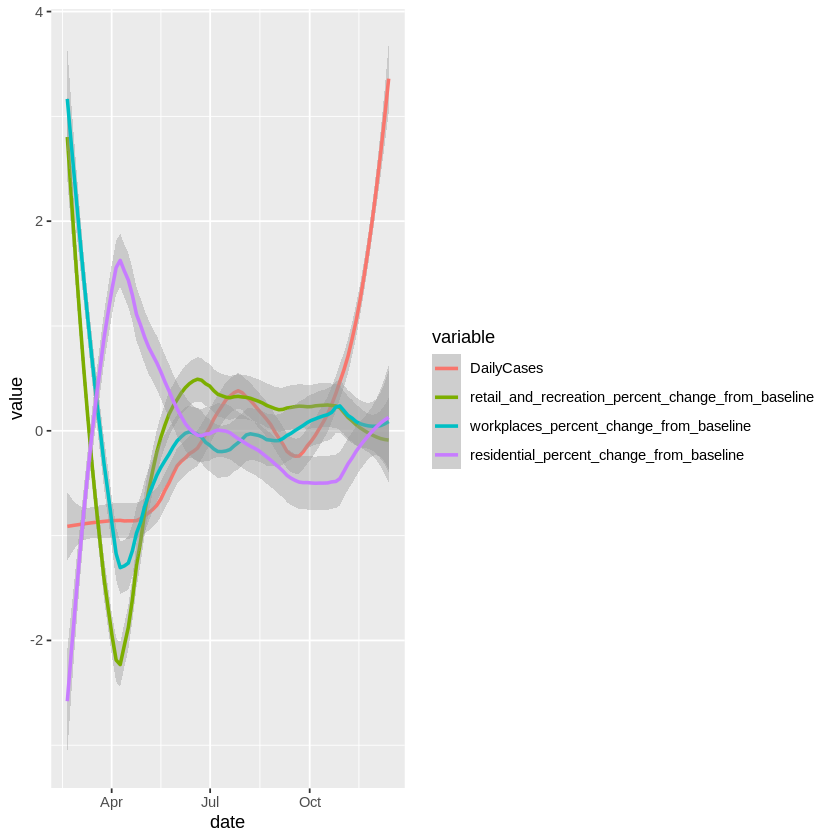

In [118]:
selected_columns = c('DailyCases', 'retail_and_recreation_percent_change_from_baseline', 
'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline')

#selected_columns = c('DailyCases','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline')

df_melt <- melt(tb_GMCovidmycounty_scaled, measure.vars=selected_columns, value.names="Values", varialbe.name="varialbe" )
ggplot(df_melt, aes(x=date, y=value, color=variable)) + stat_smooth(span=0.3)


# Chapter 6. Does the local weather correlared with Covid19 ?  

### Get weather data from Local airport

See https://rdrr.io/cran/worldmet/man/importNOAA.html 

This installation may take about 10 minutes

In [119]:
install.packages("worldmet", lib='/content')

also installing the dependencies ‘jpeg’, ‘maps’, ‘gridExtra’, ‘latticeExtra’, ‘mapproj’, ‘hexbin’, ‘iterators’, ‘png’, ‘raster’, ‘sp’, ‘viridis’, ‘leaflet.providers’, ‘openair’, ‘doParallel’, ‘foreach’, ‘leaflet’, ‘zoo’




In [120]:
library(worldmet, lib.loc="/content")

Find out the latitude and longitude of the location. 
Remember that longitude West should be negative. 

In [121]:
info <- getMeta(lat = 35.03, lon = -85.2) # Lovell, TN
info

usaf   wban  station                                           ctry st call
1  723240 13882 LOVELL FIELD AIRPORT                              US   TN KCHA
2  722154 53885 DALTON MUNICIPAL AIRPORT                          US   GA KDNN
3  999999 63862 VALLEY HEAD 1 SSW                                 US   AL NA  
4  723200 93801 RICHARD B RUSSELL AIRPORT                         US   GA KRMG
5  A00013 63847 ISBELL FIELD AIRPORT                              US   AL K4A9
6  720974 00344 WINCHESTER MUNICIPAL AIRPORT                      US   TN KBGF
7  999999 63896 SCOTTSBORO 2 NE                                   US   AL NA  
8  720856 00284 SCOTTSBORO MUNICIPAL AIRPORT WORD FIELD           US   AL K4A6
9  721031 00348 TULLAHOMA REGIONAL AIRPORT WILLIAM NORTHERN FIELD US   TN KTHA
10 723250 03847 CROSSVILLE MEMORIAL -WHITSON FIELD APT            US   TN KCSV
   latitude longitude elev(m) begin      end        code         longr    
1  35.034   -85.200   204.2   1973-01-01 2020-12-15 723240-13882 -1.487021
2  34.722   -84.869   216.4   2006-01-01 2020-12-15 722154-53885 -1.481243
3  34.565   -85.617   310.9   2006-05-04 2020-12-14 999999-63862 -1.494299
4  34.348   -85.161   194.8   1978-01-01 2020-12-15 723200-93801 -1.486340
5  34.474   -85.721   267.3   2006-01-01 2020-12-15 A00013-63847 -1.496114
6  35.178   -86.066   298.1   2012-02-09 2020-12-15 720974-00344 -1.502135
7  34.694   -86.000   193.9   2006-08-16 2020-12-14 999999-63896 -1.500983
8  34.689   -86.006   198.1   2010-11-30 2020-12-15 720856-00284 -1.501088
9  35.380   -86.246   330.1   2012-04-08 2020-12-15 721031-00348 -1.505277
10 35.951   -85.081   569.1   2005-01-01 2020-12-15 723250-03847 -1.484944
   latr      dist       
1  0.6114587   0.4447797
2  0.6060132  45.6580326
3  0.6032731  64.2126670
4  0.5994857  75.9187235
5  0.6016848  78.0247773
6  0.6139719  80.4799468
7  0.6055245  81.9970693
8  0.6054373  82.7400387
9  0.6174975 102.6954293
10 0.6274633 102.9756514

Pick the first row

In [122]:
local_code = paste( info$usaf[1], info$wban[1], sep='-')
local_code

[1] "723240-13882"

Now, get weather data from NOAA

In [123]:
weatherLocal <- importNOAA(code = local_code, year = 2020)
head(weatherLocal)

code         station                    date                latitude
1 723240-13882 CHATTANOOGA AIRPORT, TN US 2020-01-01 00:00:00 35.03362
2 723240-13882 CHATTANOOGA AIRPORT, TN US 2020-01-01 01:00:00 35.03362
3 723240-13882 CHATTANOOGA AIRPORT, TN US 2020-01-01 02:00:00 35.03362
4 723240-13882 CHATTANOOGA AIRPORT, TN US 2020-01-01 03:00:00 35.03362
5 723240-13882 CHATTANOOGA AIRPORT, TN US 2020-01-01 04:00:00 35.03362
6 723240-13882 CHATTANOOGA AIRPORT, TN US 2020-01-01 05:00:00 35.03362
  longitude elev  ws   wd       air_temp atmos_pres ⋯ cl_1 cl_2 cl_3 cl
1 -85.20044 204.2 2.85 214.5603 8.05     1016.2     ⋯ 0    NA   NA   0 
2 -85.20044 204.2 2.10 230.0000 7.80     1016.7     ⋯ 0    NA   NA   0 
3 -85.20044 204.2 2.10 220.0000 6.70     1016.8     ⋯ 0    NA   NA   0 
4 -85.20044 204.2 2.10 250.0000 6.10     1017.6     ⋯ 0    NA   NA   0 
5 -85.20044 204.2 2.60 260.0000 6.10     1017.8     ⋯ 0    NA   NA   0 
6 -85.20044 204.2 1.50 280.0000 4.40     1017.8     ⋯ 0    NA   NA   0 
  cl_1_height cl_2_height cl_3_height precip_6 precip pwc
1 NA          NA          NA          NA       0      NA 
2 NA          NA          NA          NA       0      NA 
3 NA          NA          NA          NA       0      NA 
4 NA          NA          NA          NA       0      NA 
5 NA          NA          NA          NA       0      NA 
6 NA          NA          NA          NA       0      NA

In [124]:
names(weatherLocal)

[1] "code"        "station"     "date"        "latitude"    "longitude"  
 [6] "elev"        "ws"          "wd"          "air_temp"    "atmos_pres" 
[11] "visibility"  "dew_point"   "RH"          "ceil_hgt"    "cl_1"       
[16] "cl_2"        "cl_3"        "cl"          "cl_1_height" "cl_2_height"
[21] "cl_3_height" "precip_6"    "precip"      "pwc"

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 31 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 21 row(s) containing missing values (geom_path).”


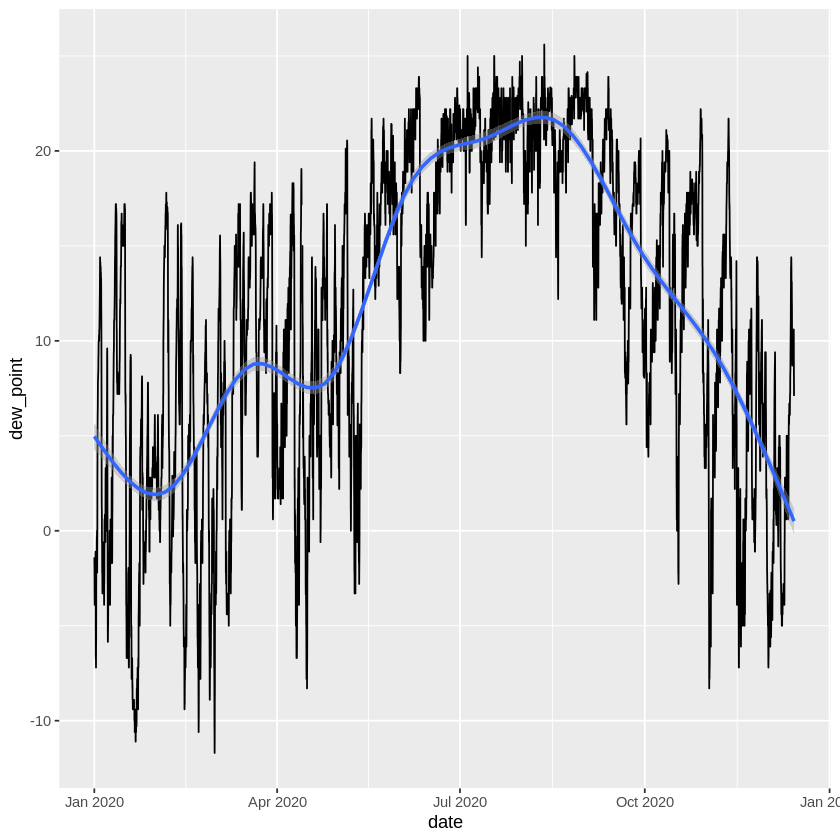

In [125]:
library(ggplot2)
ggplot(weatherLocal, aes(x=date,y=dew_point)) + geom_line() + stat_smooth(span=0.3)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 30 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 21 row(s) containing missing values (geom_path).”


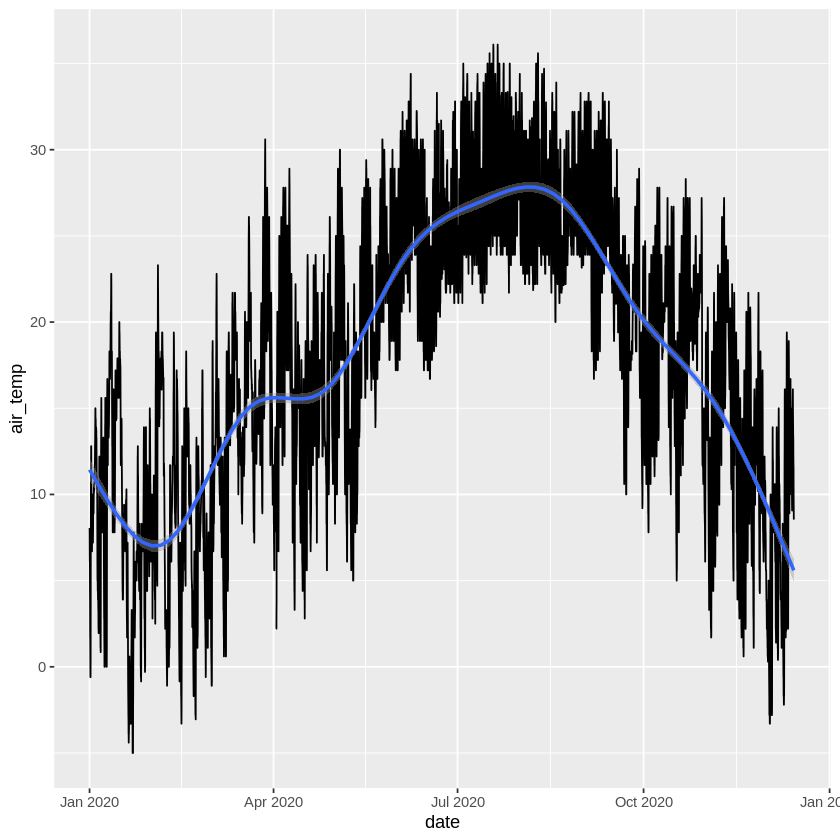

In [126]:
ggplot(weatherLocal, aes(x=date,y=air_temp)) + geom_line() + stat_smooth(span=0.3)

Pick air temperature, dew_point, and relative humidity

In [127]:
weatherLocal2 <- weatherLocal %>% dplyr::select( c('date', 'air_temp', 'dew_point', 'RH'))
head(weatherLocal2)

date                air_temp dew_point RH      
1 2020-01-01 00:00:00 8.05     -1.4      51.69594
2 2020-01-01 01:00:00 7.80     -1.7      51.40293
3 2020-01-01 02:00:00 6.70     -2.2      53.40894
4 2020-01-01 03:00:00 6.10     -3.3      51.31885
5 2020-01-01 04:00:00 6.10     -3.9      49.08370
6 2020-01-01 05:00:00 4.40     -3.3      57.71365

### Reformate dates

In [128]:
library(lubridate)

In [129]:
clean_dates = gsub( " UTC ", "", weatherLocal2$date)
weatherLocal2$YMD = as.Date(clean_dates)
head(weatherLocal2)

date                air_temp dew_point RH       YMD       
1 2020-01-01 00:00:00 8.05     -1.4      51.69594 2020-01-01
2 2020-01-01 01:00:00 7.80     -1.7      51.40293 2020-01-01
3 2020-01-01 02:00:00 6.70     -2.2      53.40894 2020-01-01
4 2020-01-01 03:00:00 6.10     -3.3      51.31885 2020-01-01
5 2020-01-01 04:00:00 6.10     -3.9      49.08370 2020-01-01
6 2020-01-01 05:00:00 4.40     -3.3      57.71365 2020-01-01

Calculate the daily average weather measurement 

In [130]:
weatherLocal3 <- weatherLocal2 %>% group_by( YMD ) %>% summarise_if( is.numeric, mean, na.rm=TRUE)

tail( weatherLocal3 )

YMD        air_temp  dew_point RH      
1 2020-12-10  8.221181  2.753750 72.79753
2 2020-12-11  9.256250  3.970833 72.70274
3 2020-12-12 12.412500  9.500000 82.94021
4 2020-12-13 12.428819 10.568056 89.23105
5 2020-12-14 11.255000  9.452083 88.96425
6 2020-12-15       NaN       NaN      NaN

### Merge local weather data with Covid19 data

In [131]:
tail(tb_GMCovidmycounty2)
tb_GMCovidmycounty2$YMD = ymd( row.names(tb_GMCovidmycounty2) )

DailyCases retail_and_recreation_percent_change_from_baseline
2020-12-08 310        -12                                               
2020-12-09 312        -11                                               
2020-12-10 323        -13                                               
2020-12-11 270        -15                                               
2020-12-12 342        -17                                               
2020-12-13 455        -10                                               
           grocery_and_pharmacy_percent_change_from_baseline
2020-12-08 -5                                               
2020-12-09 -2                                               
2020-12-10 -3                                               
2020-12-11 -5                                               
2020-12-12 -4                                               
2020-12-13 -3                                               
           parks_percent_change_from_baseline
2020-12-08  11                               
2020-12-09   6                               
2020-12-10   7                               
2020-12-11  11                               
2020-12-12 -25                               
2020-12-13   1                               
           transit_stations_percent_change_from_baseline
2020-12-08 -51                                          
2020-12-09 -48                                          
2020-12-10 -51                                          
2020-12-11 -44                                          
2020-12-12 -51                                          
2020-12-13 -58                                          
           workplaces_percent_change_from_baseline
2020-12-08 -28                                    
2020-12-09 -30                                    
2020-12-10 -29                                    
2020-12-11 -29                                    
2020-12-12 -13                                    
2020-12-13 -16                                    
           residential_percent_change_from_baseline
2020-12-08  9                                      
2020-12-09 10                                      
2020-12-10  9                                      
2020-12-11 10                                      
2020-12-12  5                                      
2020-12-13  4

In [132]:
tail(tb_GMCovidmycounty2)

DailyCases retail_and_recreation_percent_change_from_baseline
2020-12-08 310        -12                                               
2020-12-09 312        -11                                               
2020-12-10 323        -13                                               
2020-12-11 270        -15                                               
2020-12-12 342        -17                                               
2020-12-13 455        -10                                               
           grocery_and_pharmacy_percent_change_from_baseline
2020-12-08 -5                                               
2020-12-09 -2                                               
2020-12-10 -3                                               
2020-12-11 -5                                               
2020-12-12 -4                                               
2020-12-13 -3                                               
           parks_percent_change_from_baseline
2020-12-08  11                               
2020-12-09   6                               
2020-12-10   7                               
2020-12-11  11                               
2020-12-12 -25                               
2020-12-13   1                               
           transit_stations_percent_change_from_baseline
2020-12-08 -51                                          
2020-12-09 -48                                          
2020-12-10 -51                                          
2020-12-11 -44                                          
2020-12-12 -51                                          
2020-12-13 -58                                          
           workplaces_percent_change_from_baseline
2020-12-08 -28                                    
2020-12-09 -30                                    
2020-12-10 -29                                    
2020-12-11 -29                                    
2020-12-12 -13                                    
2020-12-13 -16                                    
           residential_percent_change_from_baseline YMD       
2020-12-08  9                                       2020-12-08
2020-12-09 10                                       2020-12-09
2020-12-10  9                                       2020-12-10
2020-12-11 10                                       2020-12-11
2020-12-12  5                                       2020-12-12
2020-12-13  4                                       2020-12-13

In [133]:
tb_local=   merge(x=tb_GMCovidmycounty2, y=weatherLocal3, by= 'YMD', all.y=FALSE)
row.names( tb_local ) = tb_local$YMD
tail(tb_local)

YMD        DailyCases
2020-12-08 2020-12-08 310       
2020-12-09 2020-12-09 312       
2020-12-10 2020-12-10 323       
2020-12-11 2020-12-11 270       
2020-12-12 2020-12-12 342       
2020-12-13 2020-12-13 455       
           retail_and_recreation_percent_change_from_baseline
2020-12-08 -12                                               
2020-12-09 -11                                               
2020-12-10 -13                                               
2020-12-11 -15                                               
2020-12-12 -17                                               
2020-12-13 -10                                               
           grocery_and_pharmacy_percent_change_from_baseline
2020-12-08 -5                                               
2020-12-09 -2                                               
2020-12-10 -3                                               
2020-12-11 -5                                               
2020-12-12 -4                                               
2020-12-13 -3                                               
           parks_percent_change_from_baseline
2020-12-08  11                               
2020-12-09   6                               
2020-12-10   7                               
2020-12-11  11                               
2020-12-12 -25                               
2020-12-13   1                               
           transit_stations_percent_change_from_baseline
2020-12-08 -51                                          
2020-12-09 -48                                          
2020-12-10 -51                                          
2020-12-11 -44                                          
2020-12-12 -51                                          
2020-12-13 -58                                          
           workplaces_percent_change_from_baseline
2020-12-08 -28                                    
2020-12-09 -30                                    
2020-12-10 -29                                    
2020-12-11 -29                                    
2020-12-12 -13                                    
2020-12-13 -16                                    
           residential_percent_change_from_baseline air_temp  dew_point
2020-12-08  9                                        3.806250 -3.968750
2020-12-09 10                                        4.352083 -1.252083
2020-12-10  9                                        8.221181  2.753750
2020-12-11 10                                        9.256250  3.970833
2020-12-12  5                                       12.412500  9.500000
2020-12-13  4                                       12.428819 10.568056
           RH      
2020-12-08 57.62878
2020-12-09 70.49507
2020-12-10 72.79753
2020-12-11 72.70274
2020-12-12 82.94021
2020-12-13 89.23105

In [134]:
cbind( names( tb_local ), seq(1:length(tb_local[1,])))

[,1]                                               [,2]
 [1,] YMD                                                1   
 [2,] DailyCases                                         2   
 [3,] retail_and_recreation_percent_change_from_baseline 3   
 [4,] grocery_and_pharmacy_percent_change_from_baseline  4   
 [5,] parks_percent_change_from_baseline                 5   
 [6,] transit_stations_percent_change_from_baseline      6   
 [7,] workplaces_percent_change_from_baseline            7   
 [8,] residential_percent_change_from_baseline           8   
 [9,] air_temp                                           9   
[10,] dew_point                                          10  
[11,] RH                                                 11

In [135]:
names(tb_local) = c("YMD", "DailyCases", "retail", "grocery", "parks", "transit", "workplace", "residential", "air_temp", "dew_point", "RH")

In [136]:
startdate = mdy('3/1/2020')
enddate  = today(tzone='EST')

tb_local2 <- tb_local %>% 
  #dplyr::select( c(1,2,)) %>%
  dplyr::filter( between(YMD, startdate, enddate))
  
head( tb_local2 )


YMD        DailyCases retail grocery parks transit workplace
2020-03-01 2020-03-01 0          13     6        44   13      3        
2020-03-02 2020-03-02 0           2     0       -20   -3      0        
2020-03-03 2020-03-03 0          13     7        54   12      1        
2020-03-04 2020-03-04 0           9     7        22    8      2        
2020-03-05 2020-03-05 0           8     6         4   13      2        
2020-03-06 2020-03-06 0           7     2        31   13      2        
           residential air_temp  dew_point RH      
2020-03-01 -2           6.750000 -2.731250 56.63595
2020-03-02  2           9.814583  6.854167 83.40979
2020-03-03 -1          16.348264 12.214583 80.43204
2020-03-04 -1          14.316667  5.279167 56.29383
2020-03-05  0          11.585417  7.622917 77.22352
2020-03-06  0           9.316667  1.639583 63.64460

### plot cases and weather

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



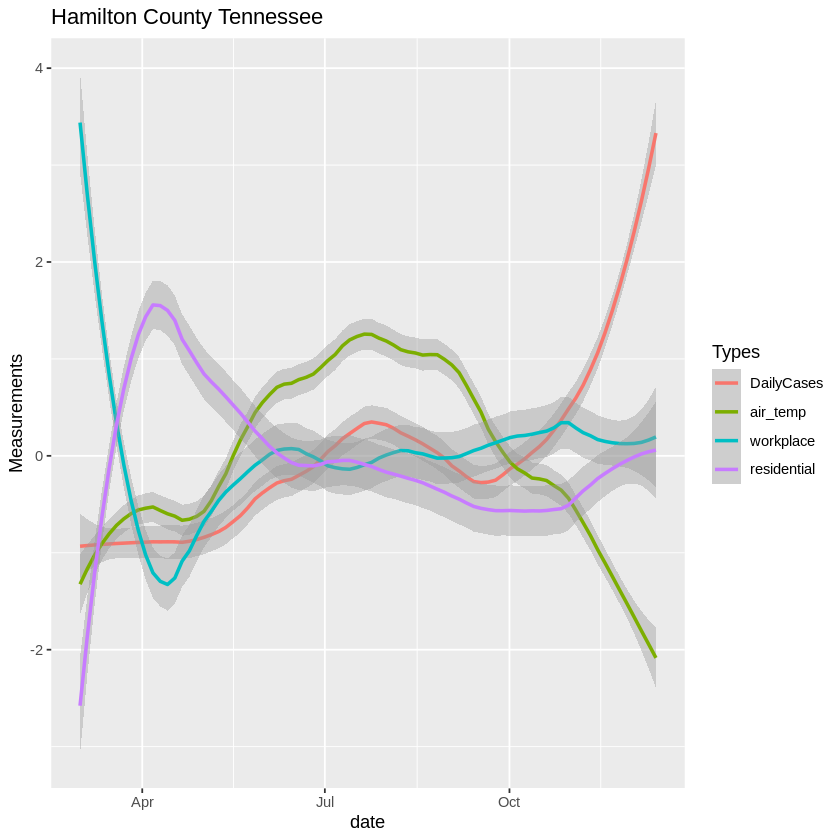

In [138]:
tb_local_scaled = data.frame( as.matrix(scale(tb_local2[,2:11])) )
tb_local_scaled$date = tb_local2$YMD

df_tmp <- melt(tb_local_scaled, measure.vars = c("DailyCases", "air_temp", "workplace", "residential" ), value.name = 'Measurements', variable.name = 'Types')
plot <- ggplot(df_tmp, aes(x=date, y=Measurements, color=Types)) + stat_smooth(span=0.3)
plot + ggtitle( paste( myCounty, myState))

# Chapter 7 (Optional), Explore the USA state-level data

Group by states

## Convert the county-level time series data to state-level data 

In [140]:
tb0 = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))
#str(tb.jhu) #this is a tibble
head(tb0)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  iso2 = col_character(),
  iso3 = col_character(),
  Admin2 = col_character(),
  Province_State = col_character(),
  Country_Region = col_character(),
  Combined_Key = col_character()
)
ℹ Use `spec()` for the full column specifications.




UID      iso2 iso3 code3 FIPS Admin2  Province_State Country_Region Lat     
1 84001001 US   USA  840   1001 Autauga Alabama        US             32.53953
2 84001003 US   USA  840   1003 Baldwin Alabama        US             30.72775
3 84001005 US   USA  840   1005 Barbour Alabama        US             31.86826
4 84001007 US   USA  840   1007 Bibb    Alabama        US             32.99642
5 84001009 US   USA  840   1009 Blount  Alabama        US             33.98211
6 84001011 US   USA  840   1011 Bullock Alabama        US             32.10031
  Long_     ⋯ 12/6/20 12/7/20 12/8/20 12/9/20 12/10/20 12/11/20 12/12/20
1 -86.64408 ⋯ 3005    3043    3087     3117    3186     3233     3258   
2 -87.72207 ⋯ 9728    9821    9974    10087   10288    10489    10665   
3 -85.38713 ⋯ 1223    1224    1240     1245    1258     1264     1269   
4 -87.12511 ⋯ 1293    1299    1317     1322    1359     1398     1417   
5 -86.56791 ⋯ 3299    3324    3426     3496    3600     3663     3744   
6 -85.71266 ⋯  713     714     719      722     722      723      725   
  12/13/20 12/14/20 12/15/20
1  3300     3329     3426   
2 10806    10898    11061   
3  1272     1275     1292   
4  1441     1455     1504   
5  3776     3803     3881   
6   728      728      733

merge all row of the same state by 'group_by'
follow by 'summarize_if'

In [141]:
tb1 = tb0[, c(7, 50:length(tb[1,])) ]

tb2 <- tb1 %>%
  group_by(Province_State) %>%
  summarize_if(is.numeric, sum,na.rm=TRUE)

head(tb2)

Province_State 2/29/20 3/1/20 3/2/20 3/3/20 3/4/20 3/5/20 3/6/20 3/7/20
1 Alabama         0       0      0      0      0      0      0      0    
2 Alaska          0       0      0      0      0      0      0      0    
3 American Samoa  0       0      0      0      0      0      0      0    
4 Arizona         1       1      1      1      1      1      2      4    
5 Arkansas        0       0      0      0      0      0      0      0    
6 California     12      12     21     25     35     51     59     81    
  3/8/20 ⋯ 12/6/20 12/7/20 12/8/20 12/9/20 12/10/20 12/11/20 12/12/20 12/13/20
1  0     ⋯  269877  272229  276665  280187  284922   288775   292841   295631 
2  0     ⋯   37036   37539   38116   38707   39345    39975    40497    41143 
3  0     ⋯       0       0       0       0       0        0        0        0 
4  4     ⋯  364276  365843  378157  382601  387529   394512   402589   408442 
5  0     ⋯  170924  172042  174325  176652  178854   181624   184252   185702 
6 95     ⋯ 1366673 1390828 1415396 1448987 1482551  1516215  1549176  1585378 
  12/14/20 12/15/20
1  297895   301533 
2   41573    41858 
3       0        0 
4  420248   424382 
5  187057   189198 
6 1611493  1644742

In [142]:
length( tb2$Province_State )
print( paste("There are ", length( tb2$Province_State ),  " states"))

[1] 58

[1] "There are  58  states"


## Covert cumulative counts into daily cases

### First, do a few tests on simple data sets to make sure that we know what we are doing.

In [143]:
? apply

In [144]:
? diff

In [145]:
x = data.frame(1:10)
x

X1.10
1   1   
2   2   
3   3   
4   4   
5   5   
6   6   
7   7   
8   8   
9   9   
10 10

In [146]:
apply(x, 2, diff)

X1.10
 [1,] 1    
 [2,] 1    
 [3,] 1    
 [4,] 1    
 [5,] 1    
 [6,] 1    
 [7,] 1    
 [8,] 1    
 [9,] 1

In [147]:
y = data.frame(10:1)
y

X10.1
1  10   
2   9   
3   8   
4   7   
5   6   
6   5   
7   4   
8   3   
9   2   
10  1

In [148]:
apply(y, 2, diff)

X10.1
 [1,] -1   
 [2,] -1   
 [3,] -1   
 [4,] -1   
 [5,] -1   
 [6,] -1   
 [7,] -1   
 [8,] -1   
 [9,] -1

### Now, process a small data set to verify the results

In [150]:
test = tb2[1:5, 10:20]
test

3/8/20 3/9/20 3/10/20 3/11/20 3/12/20 3/13/20 3/14/20 3/15/20 3/16/20 3/17/20
1 0      0      0       3       4       8       15      28      36      51     
2 0      0      0       0       0       1        1       1       1       4     
3 0      0      0       0       0       0        0       0       0       0     
4 4      4      6       9       9       9       12      12      18      20     
5 0      0      0       0       0       9       12       3       3       3     
  3/18/20
1 61     
2  9     
3  0     
4 27     
5  4

In [151]:
apply( test, 1, diff)

[,1] [,2] [,3] [,4] [,5]
3/9/20   0   0    0    0     0  
3/10/20  0   0    0    2     0  
3/11/20  3   0    0    3     0  
3/12/20  1   0    0    0     0  
3/13/20  4   1    0    0     9  
3/14/20  7   0    0    3     3  
3/15/20 13   0    0    0    -9  
3/16/20  8   0    0    6     0  
3/17/20 15   3    0    2     0  
3/18/20 10   5    0    7     1

### Now, we are comfortable to apply our method to the entire data set. 

In [152]:
tb3 = apply(tb2[, 2:length(tb2[1,])], 1, diff)
tb3= data.frame(tb3)
head(tb3)

X1 X2 X3 X4 X5 X6 X7 X8 X9 X10 ⋯ X49 X50 X51 X52 X53 X54 X55 X56 X57 X58
3/1/20 0  0  0  0  0   0 0  0  0  0   ⋯ 0   0   0   0   0   0    4  0   0   0  
3/2/20 0  0  0  0  0   9 0  0  0  0   ⋯ 0   0   0   0   0   0    7  0   0   0  
3/3/20 0  0  0  0  0   4 0  0  0  0   ⋯ 0   0   0   0   0   0    9  0   0   0  
3/4/20 0  0  0  0  0  10 0  0  0  0   ⋯ 0   0   0   0   0   0   12  0   0   0  
3/5/20 0  0  0  0  0  16 2  0  0  0   ⋯ 1   3   0   0   0   0   31  0   0   0  
3/6/20 0  0  0  1  0   8 6  0  0  0   ⋯ 0   1   0   0   0   0    8  0   0   0

## Add states names as columns names

Current names are not informative

In [153]:
names(tb3)

[1] "X1"  "X2"  "X3"  "X4"  "X5"  "X6"  "X7"  "X8"  "X9"  "X10" "X11" "X12"
[13] "X13" "X14" "X15" "X16" "X17" "X18" "X19" "X20" "X21" "X22" "X23" "X24"
[25] "X25" "X26" "X27" "X28" "X29" "X30" "X31" "X32" "X33" "X34" "X35" "X36"
[37] "X37" "X38" "X39" "X40" "X41" "X42" "X43" "X44" "X45" "X46" "X47" "X48"
[49] "X49" "X50" "X51" "X52" "X53" "X54" "X55" "X56" "X57" "X58"

Information of States will be more relevant.

In [154]:
tb2$Province_State

[1] "Alabama"                  "Alaska"                  
 [3] "American Samoa"           "Arizona"                 
 [5] "Arkansas"                 "California"              
 [7] "Colorado"                 "Connecticut"             
 [9] "Delaware"                 "Diamond Princess"        
[11] "District of Columbia"     "Florida"                 
[13] "Georgia"                  "Grand Princess"          
[15] "Guam"                     "Hawaii"                  
[17] "Idaho"                    "Illinois"                
[19] "Indiana"                  "Iowa"                    
[21] "Kansas"                   "Kentucky"                
[23] "Louisiana"                "Maine"                   
[25] "Maryland"                 "Massachusetts"           
[27] "Michigan"                 "Minnesota"               
[29] "Mississippi"              "Missouri"                
[31] "Montana"                  "Nebraska"                
[33] "Nevada"                   "New Hampshire"           
[35] "New Jersey"               "New Mexico"              
[37] "New York"                 "North Carolina"          
[39] "North Dakota"             "Northern Mariana Islands"
[41] "Ohio"                     "Oklahoma"                
[43] "Oregon"                   "Pennsylvania"            
[45] "Puerto Rico"              "Rhode Island"            
[47] "South Carolina"           "South Dakota"            
[49] "Tennessee"                "Texas"                   
[51] "Utah"                     "Vermont"                 
[53] "Virgin Islands"           "Virginia"                
[55] "Washington"               "West Virginia"           
[57] "Wisconsin"                "Wyoming"

Assign the columns names with the State-names

In [155]:
names(tb3) = tb2$Province_State
head(tb3)

Alabama Alaska American Samoa Arizona Arkansas California Colorado
3/1/20 0       0      0              0       0         0         0       
3/2/20 0       0      0              0       0         9         0       
3/3/20 0       0      0              0       0         4         0       
3/4/20 0       0      0              0       0        10         0       
3/5/20 0       0      0              0       0        16         2       
3/6/20 0       0      0              1       0         8         6       
       Connecticut Delaware Diamond Princess ⋯ Tennessee Texas Utah Vermont
3/1/20 0           0        0                ⋯ 0         0     0    0      
3/2/20 0           0        0                ⋯ 0         0     0    0      
3/3/20 0           0        0                ⋯ 0         0     0    0      
3/4/20 0           0        0                ⋯ 0         0     0    0      
3/5/20 0           0        0                ⋯ 1         3     0    0      
3/6/20 0           0        0                ⋯ 0         1     0    0      
       Virgin Islands Virginia Washington West Virginia Wisconsin Wyoming
3/1/20 0              0         4         0             0         0      
3/2/20 0              0         7         0             0         0      
3/3/20 0              0         9         0             0         0      
3/4/20 0              0        12         0             0         0      
3/5/20 0              0        31         0             0         0      
3/6/20 0              0         8         0             0         0

## Convert date-text to Date type

In [156]:
row.names(tb3)

[1] "3/1/20"   "3/2/20"   "3/3/20"   "3/4/20"   "3/5/20"   "3/6/20"  
  [7] "3/7/20"   "3/8/20"   "3/9/20"   "3/10/20"  "3/11/20"  "3/12/20" 
 [13] "3/13/20"  "3/14/20"  "3/15/20"  "3/16/20"  "3/17/20"  "3/18/20" 
 [19] "3/19/20"  "3/20/20"  "3/21/20"  "3/22/20"  "3/23/20"  "3/24/20" 
 [25] "3/25/20"  "3/26/20"  "3/27/20"  "3/28/20"  "3/29/20"  "3/30/20" 
 [31] "3/31/20"  "4/1/20"   "4/2/20"   "4/3/20"   "4/4/20"   "4/5/20"  
 [37] "4/6/20"   "4/7/20"   "4/8/20"   "4/9/20"   "4/10/20"  "4/11/20" 
 [43] "4/12/20"  "4/13/20"  "4/14/20"  "4/15/20"  "4/16/20"  "4/17/20" 
 [49] "4/18/20"  "4/19/20"  "4/20/20"  "4/21/20"  "4/22/20"  "4/23/20" 
 [55] "4/24/20"  "4/25/20"  "4/26/20"  "4/27/20"  "4/28/20"  "4/29/20" 
 [61] "4/30/20"  "5/1/20"   "5/2/20"   "5/3/20"   "5/4/20"   "5/5/20"  
 [67] "5/6/20"   "5/7/20"   "5/8/20"   "5/9/20"   "5/10/20"  "5/11/20" 
 [73] "5/12/20"  "5/13/20"  "5/14/20"  "5/15/20"  "5/16/20"  "5/17/20" 
 [79] "5/18/20"  "5/19/20"  "5/20/20"  "5/21/20"  "5/22/20"  "5/23/20" 
 [85] "5/24/20"  "5/25/20"  "5/26/20"  "5/27/20"  "5/28/20"  "5/29/20" 
 [91] "5/30/20"  "5/31/20"  "6/1/20"   "6/2/20"   "6/3/20"   "6/4/20"  
 [97] "6/5/20"   "6/6/20"   "6/7/20"   "6/8/20"   "6/9/20"   "6/10/20" 
[103] "6/11/20"  "6/12/20"  "6/13/20"  "6/14/20"  "6/15/20"  "6/16/20" 
[109] "6/17/20"  "6/18/20"  "6/19/20"  "6/20/20"  "6/21/20"  "6/22/20" 
[115] "6/23/20"  "6/24/20"  "6/25/20"  "6/26/20"  "6/27/20"  "6/28/20" 
[121] "6/29/20"  "6/30/20"  "7/1/20"   "7/2/20"   "7/3/20"   "7/4/20"  
[127] "7/5/20"   "7/6/20"   "7/7/20"   "7/8/20"   "7/9/20"   "7/10/20" 
[133] "7/11/20"  "7/12/20"  "7/13/20"  "7/14/20"  "7/15/20"  "7/16/20" 
[139] "7/17/20"  "7/18/20"  "7/19/20"  "7/20/20"  "7/21/20"  "7/22/20" 
[145] "7/23/20"  "7/24/20"  "7/25/20"  "7/26/20"  "7/27/20"  "7/28/20" 
[151] "7/29/20"  "7/30/20"  "7/31/20"  "8/1/20"   "8/2/20"   "8/3/20"  
[157] "8/4/20"   "8/5/20"   "8/6/20"   "8/7/20"   "8/8/20"   "8/9/20"  
[163] "8/10/20"  "8/11/20"  "8/12/20"  "8/13/20"  "8/14/20"  "8/15/20" 
[169] "8/16/20"  "8/17/20"  "8/18/20"  "8/19/20"  "8/20/20"  "8/21/20" 
[175] "8/22/20"  "8/23/20"  "8/24/20"  "8/25/20"  "8/26/20"  "8/27/20" 
[181] "8/28/20"  "8/29/20"  "8/30/20"  "8/31/20"  "9/1/20"   "9/2/20"  
[187] "9/3/20"   "9/4/20"   "9/5/20"   "9/6/20"   "9/7/20"   "9/8/20"  
[193] "9/9/20"   "9/10/20"  "9/11/20"  "9/12/20"  "9/13/20"  "9/14/20" 
[199] "9/15/20"  "9/16/20"  "9/17/20"  "9/18/20"  "9/19/20"  "9/20/20" 
[205] "9/21/20"  "9/22/20"  "9/23/20"  "9/24/20"  "9/25/20"  "9/26/20" 
[211] "9/27/20"  "9/28/20"  "9/29/20"  "9/30/20"  "10/1/20"  "10/2/20" 
[217] "10/3/20"  "10/4/20"  "10/5/20"  "10/6/20"  "10/7/20"  "10/8/20" 
[223] "10/9/20"  "10/10/20" "10/11/20" "10/12/20" "10/13/20" "10/14/20"
[229] "10/15/20" "10/16/20" "10/17/20" "10/18/20" "10/19/20" "10/20/20"
[235] "10/21/20" "10/22/20" "10/23/20" "10/24/20" "10/25/20" "10/26/20"
[241] "10/27/20" "10/28/20" "10/29/20" "10/30/20" "10/31/20" "11/1/20" 
[247] "11/2/20"  "11/3/20"  "11/4/20"  "11/5/20"  "11/6/20"  "11/7/20" 
[253] "11/8/20"  "11/9/20"  "11/10/20" "11/11/20" "11/12/20" "11/13/20"
[259] "11/14/20" "11/15/20" "11/16/20" "11/17/20" "11/18/20" "11/19/20"
[265] "11/20/20" "11/21/20" "11/22/20" "11/23/20" "11/24/20" "11/25/20"
[271] "11/26/20" "11/27/20" "11/28/20" "11/29/20" "11/30/20" "12/1/20" 
[277] "12/2/20"  "12/3/20"  "12/4/20"  "12/5/20"  "12/6/20"  "12/7/20" 
[283] "12/8/20"  "12/9/20"  "12/10/20" "12/11/20" "12/12/20" "12/13/20"
[289] "12/14/20" "12/15/20"

In [157]:
tb3$dates = mdy(row.names(tb3))
head(tb3)

Alabama Alaska American Samoa Arizona Arkansas California Colorado
3/1/20 0       0      0              0       0         0         0       
3/2/20 0       0      0              0       0         9         0       
3/3/20 0       0      0              0       0         4         0       
3/4/20 0       0      0              0       0        10         0       
3/5/20 0       0      0              0       0        16         2       
3/6/20 0       0      0              1       0         8         6       
       Connecticut Delaware Diamond Princess ⋯ Texas Utah Vermont
3/1/20 0           0        0                ⋯ 0     0    0      
3/2/20 0           0        0                ⋯ 0     0    0      
3/3/20 0           0        0                ⋯ 0     0    0      
3/4/20 0           0        0                ⋯ 0     0    0      
3/5/20 0           0        0                ⋯ 3     0    0      
3/6/20 0           0        0                ⋯ 1     0    0      
       Virgin Islands Virginia Washington West Virginia Wisconsin Wyoming
3/1/20 0              0         4         0             0         0      
3/2/20 0              0         7         0             0         0      
3/3/20 0              0         9         0             0         0      
3/4/20 0              0        12         0             0         0      
3/5/20 0              0        31         0             0         0      
3/6/20 0              0         8         0             0         0      
       dates     
3/1/20 2020-03-01
3/2/20 2020-03-02
3/3/20 2020-03-03
3/4/20 2020-03-04
3/5/20 2020-03-05
3/6/20 2020-03-06

## Plot

In [158]:
tb3[,2]

[1]   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   3   5
 [19]   3   3   1  10  13   4   7  14  11  17  19   8  10  13   8  11  11  15
 [37]   6  22  13  10  11  12  15   5   8   8   8   9   5   5   2   8   6   2
 [55]   2   0   2   4   6   4   0   9   1   3   2   1   1   3   3   2   1   2
 [73]   2   1   5   2   5   5   3   0   5   0   2   5   0   3   4   1  13   6
 [91]   5  29   7  21  19  28  13  14   9  19  13  22  27  21  34  12   4  14
[109]  25  19  28  23  14  11  34  23  44  29  27  32  25  47  42  50  60  55
[127]  33  28  24  51  52  54  77 116  71  60  57  78  52  77 116 140 106 107
[145]  79  66 118 233 111 135  93 122 111 150 148  78  69  59  46  68  87 100
[163]  69  55  67 101 105  85 104  50  71  77  85  72  90  67  72  36  54  89
[181] 119  97  49  38  36  67  90 126  90  97  35  34  65 115  97 104  62  77
[199]  44  52 112 111  96 108  71  60  77 143 127 119 112 117 122 106 140 144
[217] 141 143 199 151 122 140 189 233 250 196 159 168 170 224 210 214 204 233
[235] 224 237 252 357 525 347 381 357 367 386 447 350 352 391 412 314 525 607
[253] 520 474 532 499 481 593 748 661 585 642 547 493 463 680 549 500 590 680
[271] 559 674 668 621 511 539 687 761 762 946 765 503 577 591 638 630 522 646
[289] 430 285

### Scatter plot with trend

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



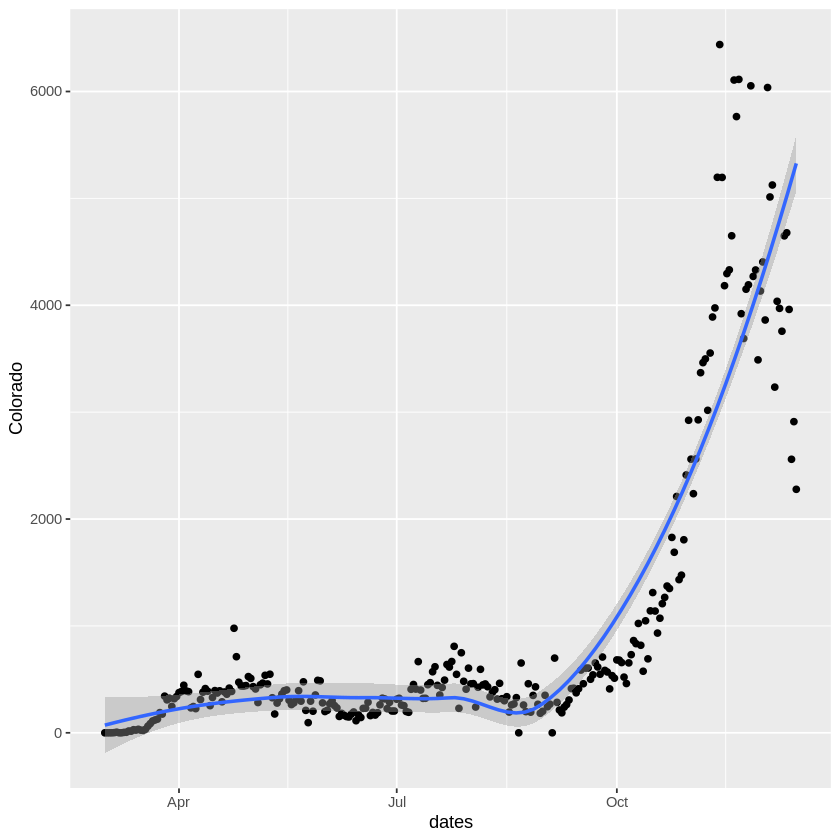

In [159]:
ggplot(tb3, aes(x=dates, y=Colorado)) + geom_point() + geom_smooth()


### Plot for a time-window

In [160]:
#end = mdy("5/1/20")
end = today(tzone='EST') - 1
end

[1] "2020-12-15"

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



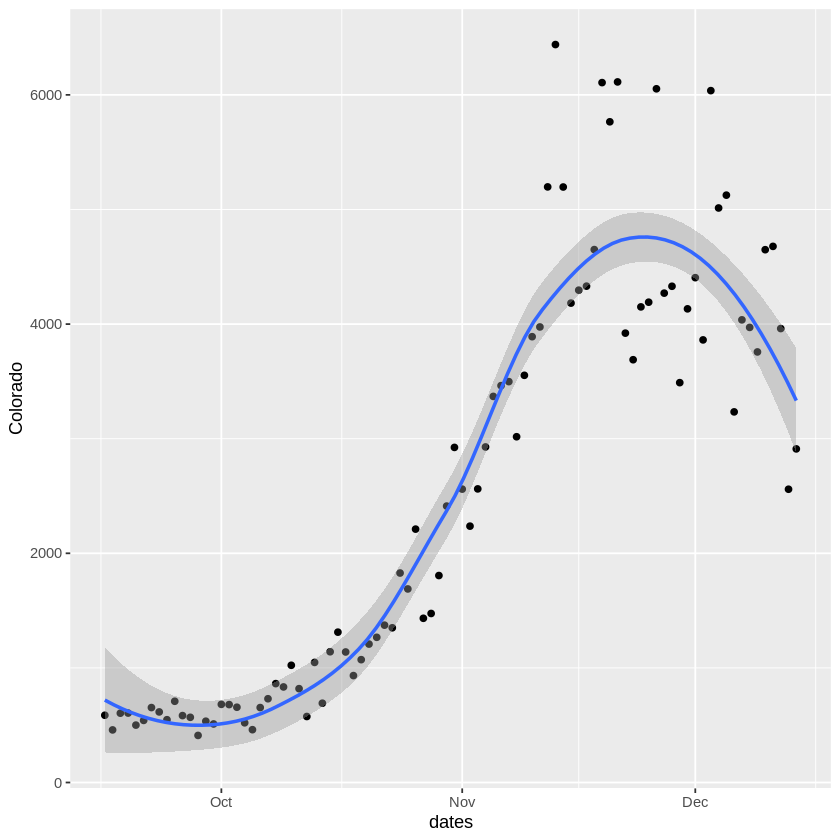

In [161]:
tb_sub <- 
 tb3 %>% filter( dates >= end- ddays(90), dates <  end) #This is 90 day window

ggplot(tb_sub, aes(x=dates, y=Colorado)) + geom_point() + geom_smooth()


### Let's look a specific State. 
How about Tennessee? 

In [162]:
names(tb3)

[1] "Alabama"                  "Alaska"                  
 [3] "American Samoa"           "Arizona"                 
 [5] "Arkansas"                 "California"              
 [7] "Colorado"                 "Connecticut"             
 [9] "Delaware"                 "Diamond Princess"        
[11] "District of Columbia"     "Florida"                 
[13] "Georgia"                  "Grand Princess"          
[15] "Guam"                     "Hawaii"                  
[17] "Idaho"                    "Illinois"                
[19] "Indiana"                  "Iowa"                    
[21] "Kansas"                   "Kentucky"                
[23] "Louisiana"                "Maine"                   
[25] "Maryland"                 "Massachusetts"           
[27] "Michigan"                 "Minnesota"               
[29] "Mississippi"              "Missouri"                
[31] "Montana"                  "Nebraska"                
[33] "Nevada"                   "New Hampshire"           
[35] "New Jersey"               "New Mexico"              
[37] "New York"                 "North Carolina"          
[39] "North Dakota"             "Northern Mariana Islands"
[41] "Ohio"                     "Oklahoma"                
[43] "Oregon"                   "Pennsylvania"            
[45] "Puerto Rico"              "Rhode Island"            
[47] "South Carolina"           "South Dakota"            
[49] "Tennessee"                "Texas"                   
[51] "Utah"                     "Vermont"                 
[53] "Virgin Islands"           "Virginia"                
[55] "Washington"               "West Virginia"           
[57] "Wisconsin"                "Wyoming"                 
[59] "dates"

In [163]:
days_window = 90 #90-day window
endday = today(tzone = 'EST')

tb_TN <- tb3 %>% 
  dplyr::select( 'Tennessee', 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday)) 

In [164]:
head(tb_TN)

Tennessee dates     
9/17/20 1053      2020-09-17
9/18/20 2357      2020-09-18
9/19/20  942      2020-09-19
9/20/20 2075      2020-09-20
9/21/20  895      2020-09-21
9/22/20  739      2020-09-22

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



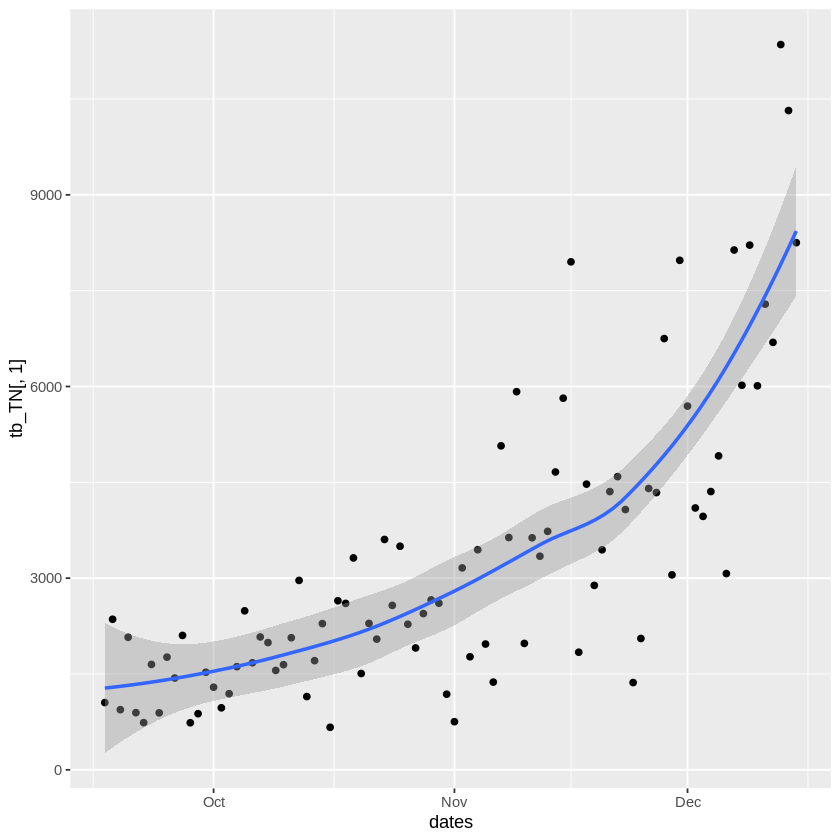

In [165]:
ggplot(tb_TN, aes(x=dates, y=tb_TN[,1])) + geom_point() + geom_smooth()

### Multiple plots to compare two states

In [166]:
days_window = 90 #90-day window
endday = today(tzone='EST') -1

mystates = c('Tennessee', 'Wisconsin', 'South Dakota')

tb_2States <- tb3 %>% 
  dplyr::select( c(mystates, 'dates') ) %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

tail(tb_2States)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(mystates)` instead of `mystates` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



Tennessee Wisconsin South Dakota dates     
12/10/20  6011     4709      704          2020-12-10
12/11/20  7289     4478      945          2020-12-11
12/12/20  6691     4624      735          2020-12-12
12/13/20 11352     2965      631          2020-12-13
12/14/20 10319     2329      316          2020-12-14
12/15/20  8251     4055      345          2020-12-15

In [167]:
library(reshape2)

In [168]:
df_tmp <- melt(tb_2States, measure.vars = mystates)
head(df_tmp)

dates      variable  value
1 2020-09-16 Tennessee 1856 
2 2020-09-17 Tennessee 1053 
3 2020-09-18 Tennessee 2357 
4 2020-09-19 Tennessee  942 
5 2020-09-20 Tennessee 2075 
6 2020-09-21 Tennessee  895

In [169]:
names(df_tmp) = c("dates", "State", "DailyCases")
head(df_tmp)

dates      State     DailyCases
1 2020-09-16 Tennessee 1856      
2 2020-09-17 Tennessee 1053      
3 2020-09-18 Tennessee 2357      
4 2020-09-19 Tennessee  942      
5 2020-09-20 Tennessee 2075      
6 2020-09-21 Tennessee  895

Warning message:
“Ignoring unknown parameters: spanc”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'



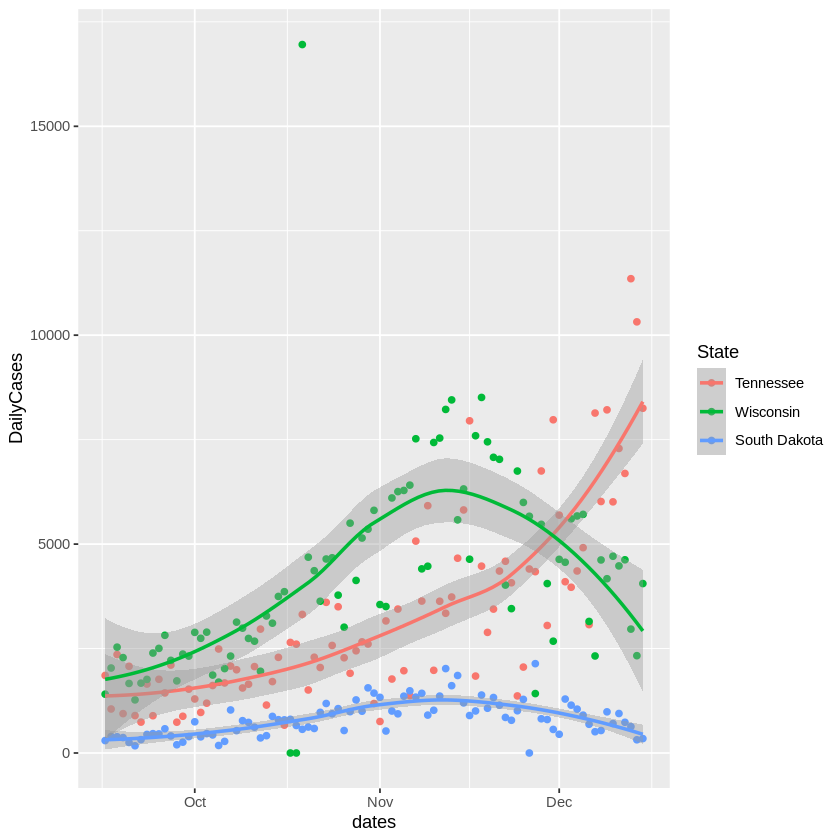

In [170]:
ggplot(df_tmp, aes(x=dates, y=DailyCases, color=State)) + geom_point() + stat_smooth(spanc=0.3)

### How about more than two states? 

In [171]:
mystates = c('Tennessee','Georgia', 'Alabama', 'Florida')

days_window = 90 #90-day window
endday = today(tzone = 'EST') -1

tb_sub <- tb3 %>% 
  dplyr::select( all_of(mystates), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

head(tb_sub)


Tennessee Georgia Alabama Florida dates     
9/16/20 1856      2062     763    2355    2020-09-16
9/17/20 1053      1847    1031    3255    2020-09-17
9/18/20 2357      1951    1314    3204    2020-09-18
9/19/20  942      2167     810    3573    2020-09-19
9/20/20 2075      1134     747    2521    2020-09-20
9/21/20  895      1184     877    1685    2020-09-21

In [172]:
df_tmp <- melt(tb_sub, measure.vars = mystates, value.name = 'DailyCases', variable.name = 'State')
head(df_tmp)

dates      State     DailyCases
1 2020-09-16 Tennessee 1856      
2 2020-09-17 Tennessee 1053      
3 2020-09-18 Tennessee 2357      
4 2020-09-19 Tennessee  942      
5 2020-09-20 Tennessee 2075      
6 2020-09-21 Tennessee  895

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”


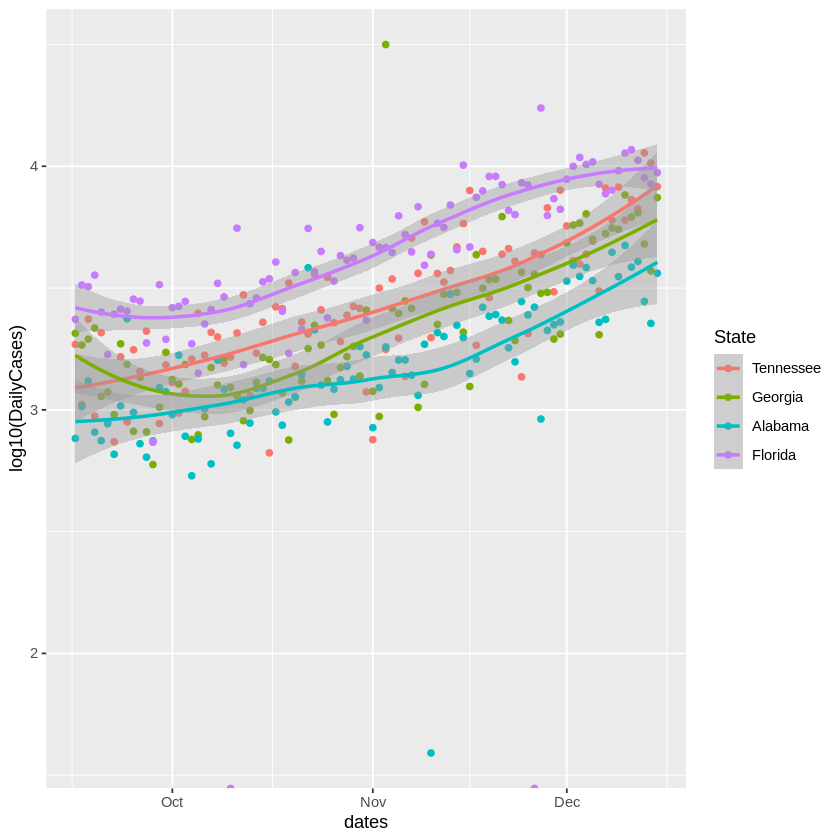

In [173]:
ggplot(df_tmp, aes(x=dates, y=log10(DailyCases), color=State)) + geom_point() + geom_smooth() 

# Chapter 8 (Optional). Transmission analysis

### Study the Germany 1918 example

In [174]:
install.packages('R0', lib = '/content')
#library('R0')
library("R0", lib.loc="/content")

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [175]:
help(package='R0')

In [176]:
#?est.R0.AR
#$example(est.R0.AR)

In [177]:
data(Germany.1918)
head(Germany.1918)

1918-09-29 1918-09-30 1918-10-01 1918-10-02 1918-10-03 1918-10-04 
        10          4          4         19          6         13

In [178]:
str(Germany.1918)

 Named num [1:126] 10 4 4 19 6 13 28 23 35 27 ...
 - attr(*, "names")= chr [1:126] "1918-09-29" "1918-09-30" "1918-10-01" "1918-10-02" ...


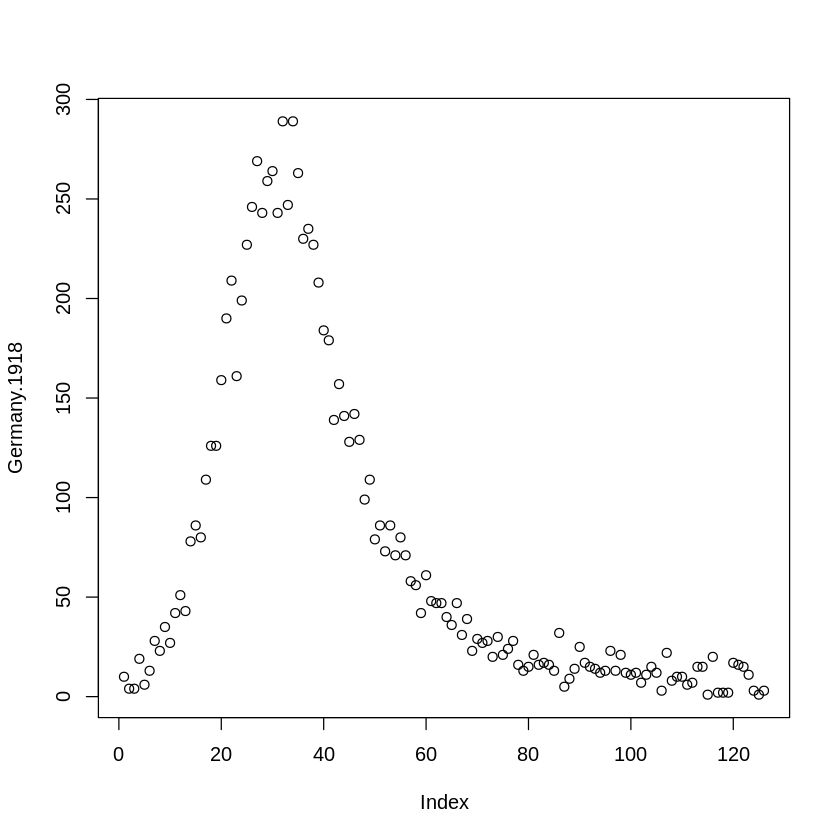

In [179]:
plot(Germany.1918)

In [180]:
?est.R0.TD


e.R0.T> #Loading package
e.R0.T> library(R0)

e.R0.T> ## Data is taken from the paper by Nishiura for key transmission parameters of an institutional
e.R0.T> ## outbreak during 1918 influenza pandemic in Germany)
e.R0.T> 
e.R0.T> data(Germany.1918)

e.R0.T> mGT<-generation.time("gamma", c(3, 1.5))

e.R0.T> TD <- est.R0.TD(Germany.1918, mGT, begin=1, end=126, nsim=100)


Warning message in est.R0.TD(Germany.1918, mGT, begin = 1, end = 126, nsim = 100):
“Accurate confidence interval for R(t) requires a large number of simulations. Consider increasing 'nsim'”
Warning message in est.R0.TD(Germany.1918, mGT, begin = 1, end = 126, nsim = 100):
“Using initial incidence as initial number of cases.”



e.R0.T> # Warning messages:
e.R0.T> # 1: In est.R0.TD(Germany.1918, mGT) : Simulations may take several minutes.
e.R0.T> # 2: In est.R0.TD(Germany.1918, mGT) : Using initial incidence as initial number of cases.
e.R0.T> TD
Reproduction number estimate using  Time-Dependent  method.
2.322239 2.272013 1.998474 1.843703 2.019297 1.867488 1.644993 1.553265 1.553317 1.601317 ...


e.R0.T> # Reproduction number estimate using  Time-Dependent  method.
e.R0.T> # 2.322239 2.272013 1.998474 1.843703 2.019297 1.867488 1.644993 1.553265 1.553317 1.601317 ...
e.R0.T> 
e.R0.T> ## An interesting way to look at these results is to agregate initial data by longest time unit,
e.R0.T> ## such as weekly incidence. This gives a global overview of the epidemic.
e.R0.T> TD.weekly <- smooth.Rt(TD, 7)

e.R0.T> TD.weekly
Reproduction number estimate using  Time-Dependent  method.
1.878424 1.580976 1.356918 1.131633 0.9615463 0.8118902 0.8045254 0.8395747 0.8542518 0.8258094 ...


e.R0.T> # Reproduction number 

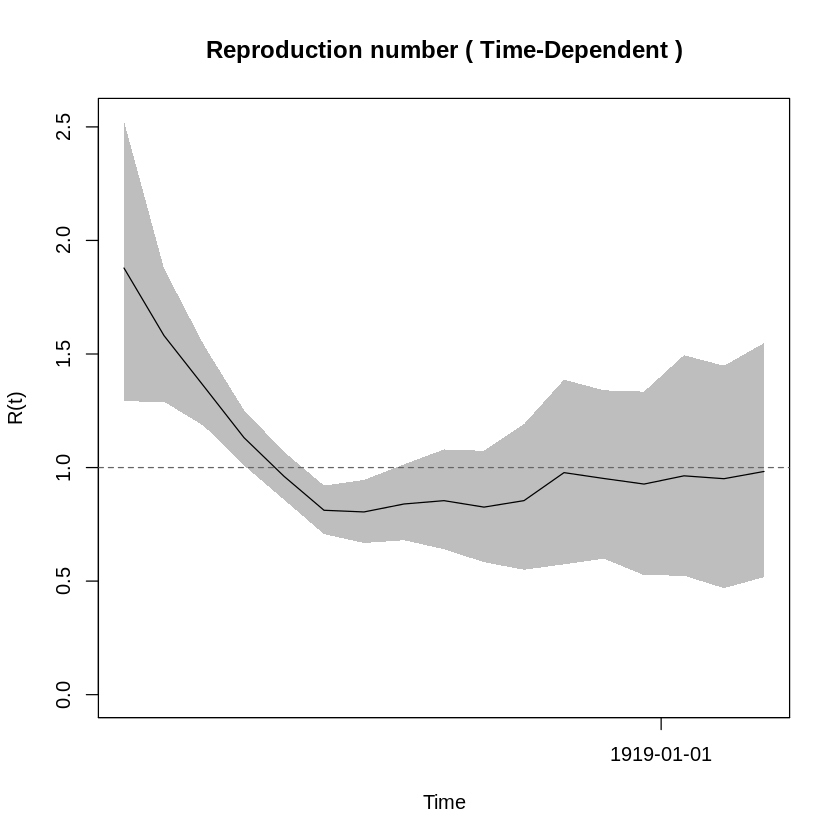

In [181]:
example(est.R0.TD)

In [182]:
mGT <- generation.time("gamma", c(3,1.5))
SB <- est.R0.SB(Germany.1918, mGT, begin=1, end=100)
str(SB)

List of 14
 $ R          : num [1:99] 0 0 2.22 0.66 1.2 1.84 1.43 1.63 1.34 1.52 ...
 $ conf.int   :'data.frame':	99 obs. of  2 variables:
  ..$ CI.lower.: num [1:99] 0.01 0.01 0.97 0.05 0.31 1.11 0.8 1.1 0.85 1.09 ...
  ..$ CI.upper.: num [1:99] 1.62 1.59 3.26 1.63 2.02 2.49 2 2.13 1.79 1.93 ...
 $ proba.Rt   :List of 100
  ..$ : num [1:4601] 0.000217 0.000217 0.000217 0.000217 0.000217 ...
  ..$ : num [1:4601] 0.0152 0.0151 0.0149 0.0148 0.0146 ...
  ..$ : num [1:4601] 0.0136 0.0135 0.0134 0.0133 0.0132 ...
  ..$ : num [1:4601] 2.03e-05 2.13e-05 2.23e-05 2.33e-05 2.44e-05 ...
  ..$ : num [1:4601] 0.00419 0.00428 0.00437 0.00446 0.00455 ...
  ..$ : num [1:4601] 0.000359 0.000378 0.000397 0.000417 0.000438 ...
  ..$ : num [1:4601] 1.32e-07 1.48e-07 1.65e-07 1.85e-07 2.06e-07 ...
  ..$ : num [1:4601] 1.06e-06 1.19e-06 1.34e-06 1.52e-06 1.71e-06 ...
  ..$ : num [1:4601] 1.27e-09 1.53e-09 1.83e-09 2.19e-09 2.63e-09 ...
  ..$ : num [1:4601] 2.00e-08 2.41e-08 2.91e-08 3.51e-08 4.22e-08 ...


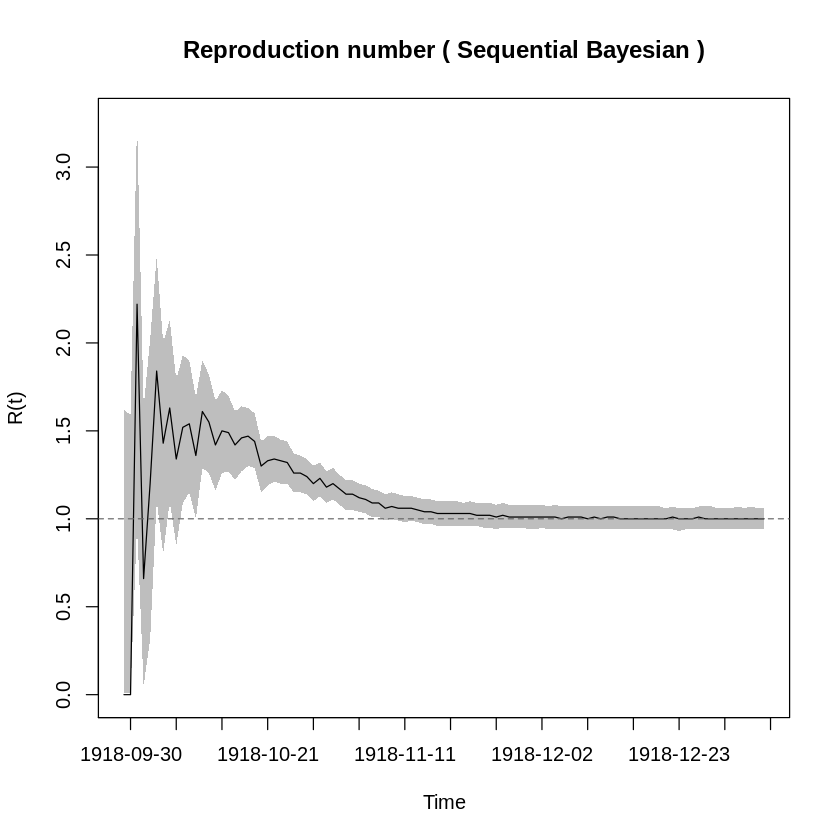

In [183]:
plot(SB)

### Estimate Rt to Covid19 for Tennessee

The mean generation time of Covid19 is estimated to 4-5 days. 

In [184]:
mystates = c('Tennessee','Georgia', 'Alabama', 'Florida')

days_window = 180 #90-day window
endday = today(tzone = 'EST') -1

tb_sub <- tb3 %>% 
  dplyr::select( all_of(mystates), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

head(tb_sub)

Tennessee Georgia Alabama Florida dates     
6/18/20  656       882     735    3207    2020-06-18
6/19/20 1247      1097     549    3822    2020-06-19
6/20/20  429      1800     458    4049    2020-06-20
6/21/20  656       892     439    3494    2020-06-21
6/22/20  451      1227     649    2926    2020-06-22
6/23/20  750      1882    1118    3286    2020-06-23

In [185]:
length(tb_sub[,1])

[1] 181

In [186]:
mGT<-generation.time("gamma", c(5, 1.5)) #model of serial generation time for SARS-CoV-2, (4, 7)
mGT

Discretized Generation Time distribution
mean: 4.999765 , sd: 1.526835 
 [1] 0.0000000000 0.0006003464 0.0240149896 0.1294177453 0.2495603758
 [6] 0.2599966046 0.1807711004 0.0946112317 0.0401491572 0.0145052741
[11] 0.0046144103 0.0013241718 0.0003489722 0.0000856206


In [187]:
TD <- est.R0.TD(tb_sub$Tennessee, mGT, begin=1, end=181, nsim=100)

Warning message in est.R0.TD(tb_sub$Tennessee, mGT, begin = 1, end = 181, nsim = 100):
“Accurate confidence interval for R(t) requires a large number of simulations. Consider increasing 'nsim'”
Warning message in est.R0.TD(tb_sub$Tennessee, mGT, begin = 1, end = 181, nsim = 100):
“Using initial incidence as initial number of cases.”


In [188]:
#str(TD)
length(tb_sub[,1])

[1] 181

In [189]:
tb_sub$Rt = TD$R

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



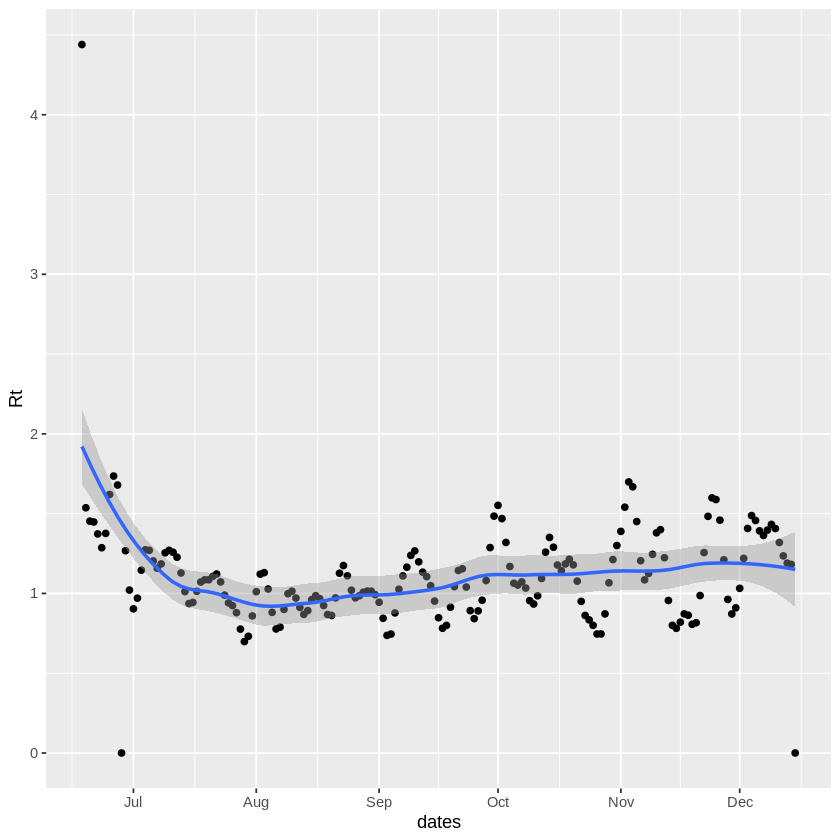

In [190]:
ggplot( tb_sub, aes(x=dates, y=Rt) ) +
   geom_point() + 
   stat_smooth( span=0.4)

## How about Hamilton County, TN? 

In [191]:
install.packages('R0')
library('R0')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [192]:
library(tidyverse)
library(lubridate)
tb = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))

tb1 <- tb %>% dplyr::select(12:length(tb[1,])) %>% as.matrix()
tb1 = as.data.frame(t(tb1))

names(tb1) = tb$Combined_Key

current_dates = names(tb)[12:length(tb[1,])]
tb1$dates = mdy(current_dates)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  iso2 = col_character(),
  iso3 = col_character(),
  Admin2 = col_character(),
  Province_State = col_character(),
  Country_Region = col_character(),
  Combined_Key = col_character()
)
ℹ Use `spec()` for the full column specifications.




### Select Hamilton, Tennessee, US

In [193]:
names(tb1) [grep(  "Tennessee", names(tb1))]

[1] "Anderson, Tennessee, US"   "Bedford, Tennessee, US"   
 [3] "Benton, Tennessee, US"     "Bledsoe, Tennessee, US"   
 [5] "Blount, Tennessee, US"     "Bradley, Tennessee, US"   
 [7] "Campbell, Tennessee, US"   "Cannon, Tennessee, US"    
 [9] "Carroll, Tennessee, US"    "Carter, Tennessee, US"    
[11] "Cheatham, Tennessee, US"   "Chester, Tennessee, US"   
[13] "Claiborne, Tennessee, US"  "Clay, Tennessee, US"      
[15] "Cocke, Tennessee, US"      "Coffee, Tennessee, US"    
[17] "Crockett, Tennessee, US"   "Cumberland, Tennessee, US"
[19] "Davidson, Tennessee, US"   "DeKalb,Tennessee,US"      
[21] "Decatur, Tennessee, US"    "Dickson, Tennessee, US"   
[23] "Dyer, Tennessee, US"       "Fayette, Tennessee, US"   
[25] "Fentress, Tennessee, US"   "Franklin, Tennessee, US"  
[27] "Gibson, Tennessee, US"     "Giles, Tennessee, US"     
[29] "Grainger, Tennessee, US"   "Greene, Tennessee, US"    
[31] "Grundy, Tennessee, US"     "Hamblen, Tennessee, US"   
[33] "Hamilton, Tennessee, US"   "Hancock, Tennessee, US"   
[35] "Hardeman, Tennessee, US"   "Hardin, Tennessee, US"    
[37] "Hawkins, Tennessee, US"    "Haywood, Tennessee, US"   
[39] "Henderson, Tennessee, US"  "Henry, Tennessee, US"     
[41] "Hickman, Tennessee, US"    "Houston, Tennessee, US"   
[43] "Humphreys, Tennessee, US"  "Jackson, Tennessee, US"   
[45] "Jefferson, Tennessee, US"  "Johnson, Tennessee, US"   
[47] "Knox, Tennessee, US"       "Lake, Tennessee, US"      
[49] "Lauderdale, Tennessee, US" "Lawrence, Tennessee, US"  
[51] "Lewis, Tennessee, US"      "Lincoln, Tennessee, US"   
[53] "Loudon, Tennessee, US"     "Macon, Tennessee, US"     
[55] "Madison, Tennessee, US"    "Marion, Tennessee, US"    
[57] "Marshall, Tennessee, US"   "Maury, Tennessee, US"     
[59] "McMinn, Tennessee, US"     "McNairy, Tennessee, US"   
[61] "Meigs, Tennessee, US"      "Monroe, Tennessee, US"    
[63] "Montgomery, Tennessee, US" "Moore, Tennessee, US"     
[65] "Morgan, Tennessee, US"     "Obion, Tennessee, US"     
[67] "Out of TN, Tennessee, US"  "Overton, Tennessee, US"   
[69] "Perry, Tennessee, US"      "Pickett, Tennessee, US"   
[71] "Polk, Tennessee, US"       "Putnam, Tennessee, US"    
[73] "Rhea, Tennessee, US"       "Roane, Tennessee, US"     
[75] "Robertson, Tennessee, US"  "Rutherford, Tennessee, US"
[77] "Scott, Tennessee, US"      "Sequatchie, Tennessee, US"
[79] "Sevier, Tennessee, US"     "Shelby, Tennessee, US"    
[81] "Smith, Tennessee, US"      "Stewart, Tennessee, US"   
[83] "Sullivan, Tennessee, US"   "Sumner, Tennessee, US"    
[85] "Tipton, Tennessee, US"     "Trousdale, Tennessee, US" 
[87] "Unassigned, Tennessee, US" "Unicoi, Tennessee, US"    
[89] "Union, Tennessee, US"      "Van Buren, Tennessee, US" 
[91] "Warren, Tennessee, US"     "Washington, Tennessee, US"
[93] "Wayne, Tennessee, US"      "Weakley, Tennessee, US"   
[95] "White, Tennessee, US"      "Williamson, Tennessee, US"
[97] "Wilson, Tennessee, US"

In [195]:
window = 180

tb_sub <-  tb1 %>% 
  dplyr::select ( c('Hamilton, Tennessee, US', 'Davidson, Tennessee, US', 'dates')) %>%
  dplyr::filter( between(dates, today(tzone='EST') - window,  today(tzone ='EST')))

str(tb_sub)

'data.frame':	180 obs. of  3 variables:
 $ Hamilton, Tennessee, US: num  2000 2050 2074 2103 2120 ...
 $ Davidson, Tennessee, US: num  7502 7571 7668 7716 7867 ...
 $ dates                  : Date, format: "2020-06-19" "2020-06-20" ...


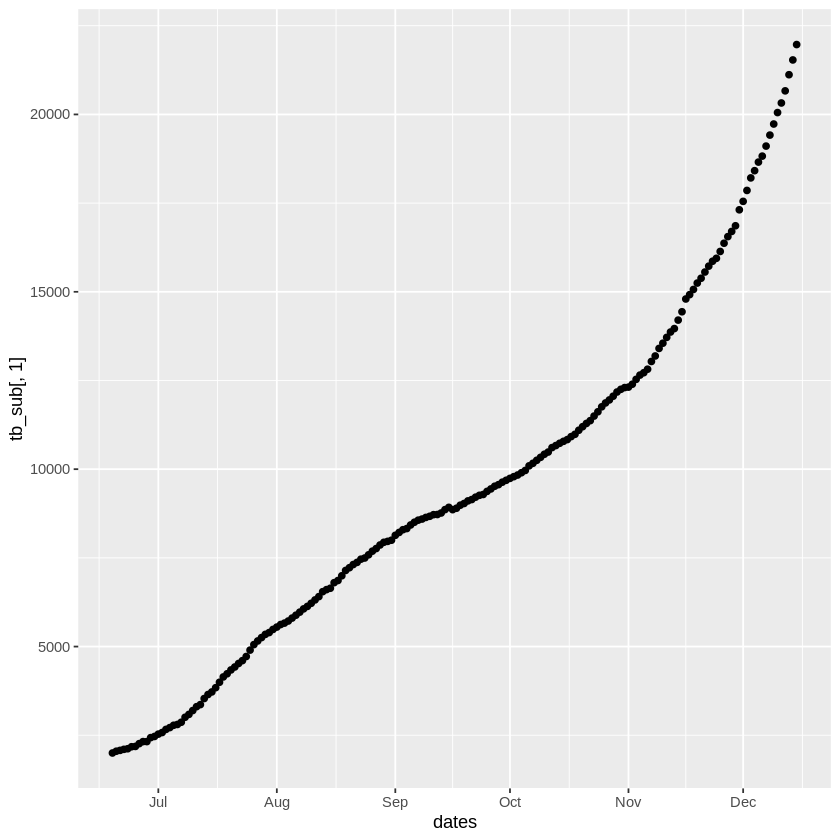

In [196]:
ggplot(tb_sub, aes(x=dates, y=tb_sub[,1])) + geom_point()

In [197]:
tail(tb_sub)

Hamilton, Tennessee, US Davidson, Tennessee, US dates     
12/10/20 20052                   48146                   2020-12-10
12/11/20 20322                   48599                   2020-12-11
12/12/20 20664                   49076                   2020-12-12
12/13/20 21119                   50108                   2020-12-13
12/14/20 21535                   50898                   2020-12-14
12/15/20 21969                   51549                   2020-12-15

### Estiamte daily cases

March 31 Tuesday has 15 cases, but Sunday and Monday has zero cases. 

Hong will try to spead the spike daily counts into previous days with zeros. 

In [198]:
tb_daily_sub = data.frame( apply(tb_sub[,1:2], 2, diff) )
head(tb_daily_sub, n=15)

Hamilton..Tennessee..US Davidson..Tennessee..US
6/20/20  50                      69                    
6/21/20  24                      97                    
6/22/20  29                      48                    
6/23/20  17                     151                    
6/24/20  56                     195                    
6/25/20   9                     196                    
6/26/20  79                     289                    
6/27/20  57                     128                    
6/28/20   0                       0                    
6/29/20 112                     341                    
6/30/20  33                     221                    
7/1/20   66                     532                    
7/2/20   45                     356                    
7/3/20   88                     325                    
7/4/20   51                     276

In [199]:
wday(mdy('3/31/20'))

[1] 3

In [200]:
tb_daily_sub$YMD = mdy(row.names(tb_daily_sub))
head(tb_daily_sub)

Hamilton..Tennessee..US Davidson..Tennessee..US YMD       
6/20/20 50                       69                     2020-06-20
6/21/20 24                       97                     2020-06-21
6/22/20 29                       48                     2020-06-22
6/23/20 17                      151                     2020-06-23
6/24/20 56                      195                     2020-06-24
6/25/20  9                      196                     2020-06-25

In [201]:
# make sure all daily cases are positive integer or zeros
tb_daily_sub$Hamilton..Tennessee..US[tb_daily_sub$Hamilton..Tennessee..US<0 ] =0
head(tb_daily_sub)
summary(  tb_daily_sub)

Hamilton..Tennessee..US Davidson..Tennessee..US YMD       
6/20/20 50                       69                     2020-06-20
6/21/20 24                       97                     2020-06-21
6/22/20 29                       48                     2020-06-22
6/23/20 17                      151                     2020-06-23
6/24/20 56                      195                     2020-06-24
6/25/20  9                      196                     2020-06-25

 Hamilton..Tennessee..US Davidson..Tennessee..US      YMD            
 Min.   :  0.0           Min.   :   0.0          Min.   :2020-06-20  
 1st Qu.: 60.0           1st Qu.: 128.5          1st Qu.:2020-08-03  
 Median : 87.0           Median : 195.0          Median :2020-09-17  
 Mean   :111.9           Mean   : 246.1          Mean   :2020-09-17  
 3rd Qu.:138.0           3rd Qu.: 343.0          3rd Qu.:2020-10-31  
 Max.   :455.0           Max.   :1032.0          Max.   :2020-12-15  

In [202]:
# correct some errors in Hamilton TN 
#tb_daily_sub[c('3/20/20', '3/21/20'), 1] = c(1,1)
#tb_daily_sub[c('3/24/20', '3/25/20'), 1] = c(7, 7)
#tb_daily_sub[c('3/29/20', '3/30/20', '3/30/20'), 1] = c(5, 5, 5)

In [203]:
tail(tb_daily_sub)

Hamilton..Tennessee..US Davidson..Tennessee..US YMD       
12/10/20 323                      551                    2020-12-10
12/11/20 270                      453                    2020-12-11
12/12/20 342                      477                    2020-12-12
12/13/20 455                     1032                    2020-12-13
12/14/20 416                      790                    2020-12-14
12/15/20 434                      651                    2020-12-15

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



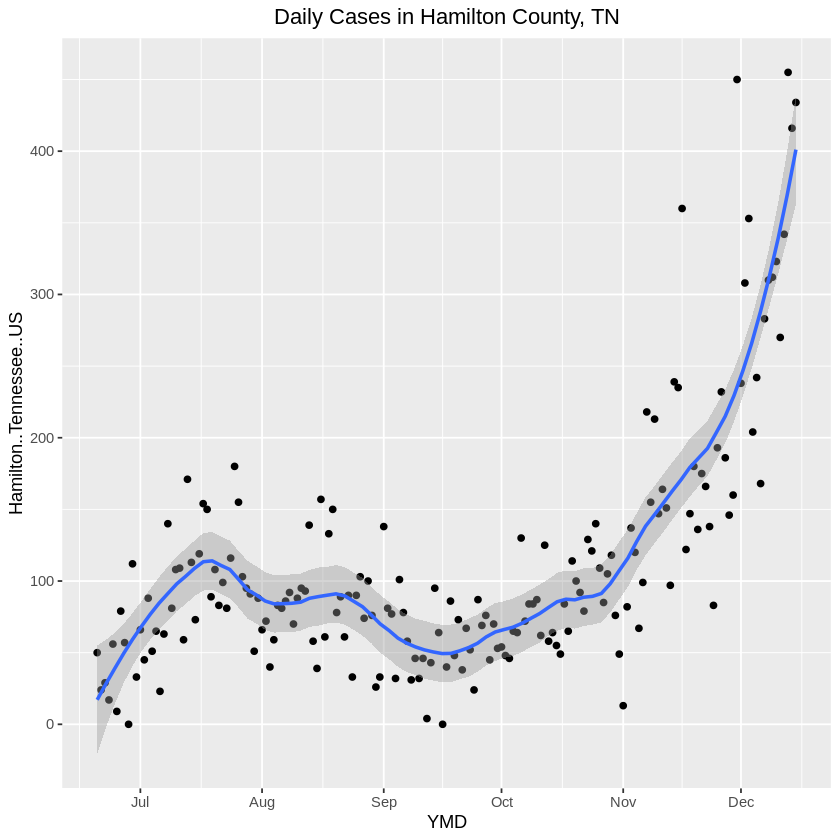

In [204]:


myplot <- ggplot( tb_daily_sub, aes(x=YMD, y=Hamilton..Tennessee..US)) + geom_point() + stat_smooth(span=0.3) 
myplot + ggtitle("Daily Cases in Hamilton County, TN") +  theme(plot.title = element_text(hjust = 0.5))

### Estimate Rt for Hamilton, TN

[1] 179

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    60.0    87.0   111.9   138.0   455.0 

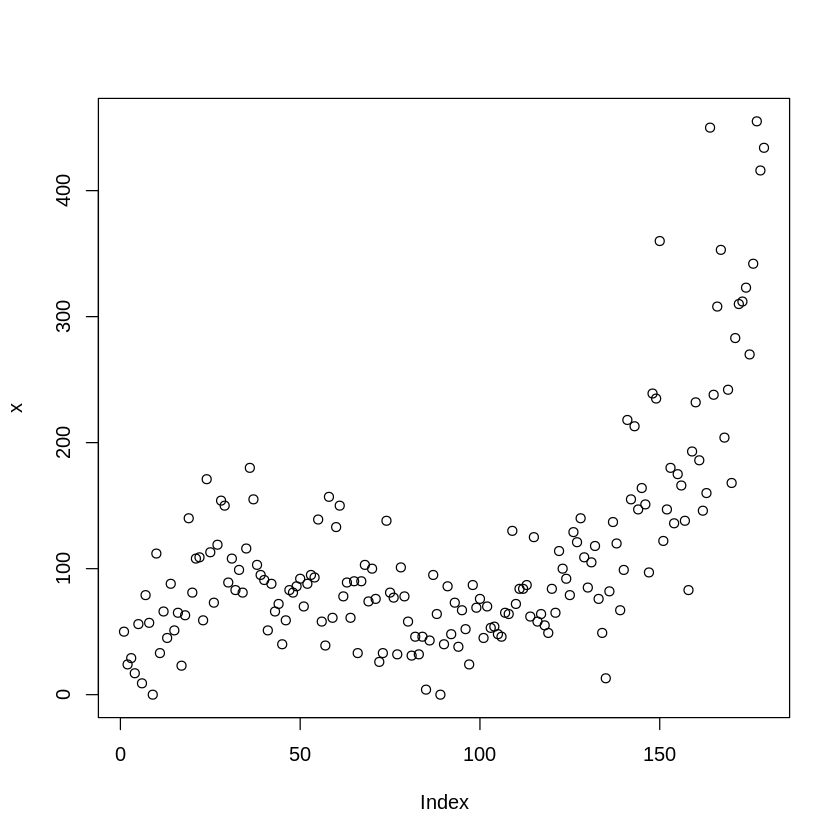

In [205]:
mGT<-generation.time("gamma", c(5, 1.5)) #based on literature reading serial generation time (incubtation time) (4-7), with long distbution
x = tb_daily_sub[,1]
x[x<0]= 0
length(x)
summary(x)
plot(x)

In [206]:
start = 1
offset = 1
stop = length(x)-offset # Rt estimation need a few day, try 5 days

TD<- est.R0.TD(x, mGT, begin=start, end=stop, nsim=100) 

Warning message in est.R0.TD(x, mGT, begin = start, end = stop, nsim = 100):
“Accurate confidence interval for R(t) requires a large number of simulations. Consider increasing 'nsim'”
Warning message in est.R0.TD(x, mGT, begin = start, end = stop, nsim = 100):
“Using initial incidence as initial number of cases.”


In [207]:
#str(TD)

In [208]:
tb_daily_sub$RtHamilton =  c( TD$R, rep(NA, offset))

In [209]:
head(tb_daily_sub)

Hamilton..Tennessee..US Davidson..Tennessee..US YMD        RtHamilton
6/20/20 50                       69                     2020-06-20 3.112539  
6/21/20 24                       97                     2020-06-21 1.910104  
6/22/20 29                       48                     2020-06-22 1.766975  
6/23/20 17                      151                     2020-06-23 1.622643  
6/24/20 56                      195                     2020-06-24 1.487390  
6/25/20  9                      196                     2020-06-25 1.464498

In [210]:
tail(tb_daily_sub)

Hamilton..Tennessee..US Davidson..Tennessee..US YMD        RtHamilton
12/10/20 323                      551                    2020-12-10 1.428682  
12/11/20 270                      453                    2020-12-11 1.412333  
12/12/20 342                      477                    2020-12-12 1.406940  
12/13/20 455                     1032                    2020-12-13 1.409182  
12/14/20 416                      790                    2020-12-14 1.409717  
12/15/20 434                      651                    2020-12-15       NA

In [211]:
number_of_rows = length(tb_daily_sub[,1 ])
tb_daily_sub$RtHamilton[ 1 : 5] = NA #remove first 5 rows 
tb_daily_sub$RtHamilton[ (number_of_rows-offset-2) :number_of_rows] = NA #remove last few rows

In [212]:
# add dates
list_of_dates = row.names( tb_daily_sub)
tb_daily_sub$dates = mdy( list_of_dates )

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 9 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 9 rows containing missing values (geom_point).”


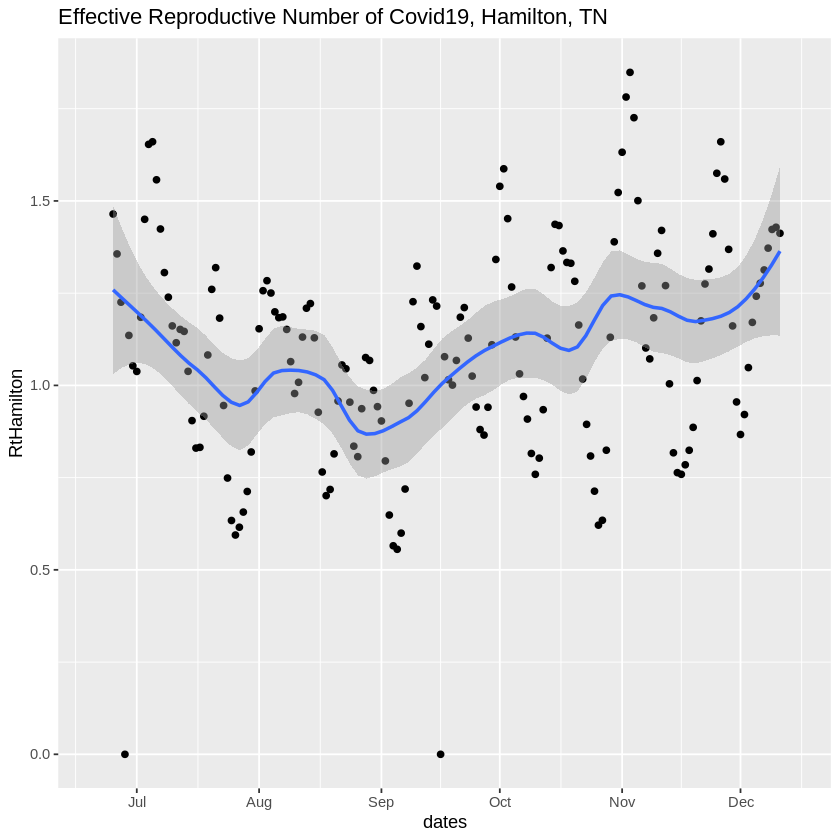

In [213]:
ggplot(tb_daily_sub, aes(x=dates, y=RtHamilton) ) +
  geom_point() +
  stat_smooth(span=.35) +
  ggtitle("Effective Reproductive Number of Covid19, Hamilton, TN")

For policy and new related to Covid19 at Hamitlon, TN, see http://health.hamiltontn.org/AllServices/Coronavirus(COVID-19)/PressReleases.aspx  <br> 

March 13, first case. <br> 

April 27, governor order restaraunt reopenning. <br> 

July 4th, holiday weekend. If it happended to Hamilton, it might happend to other counties with similar densities? The TN state did show a spike after 4 of July <br> 


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



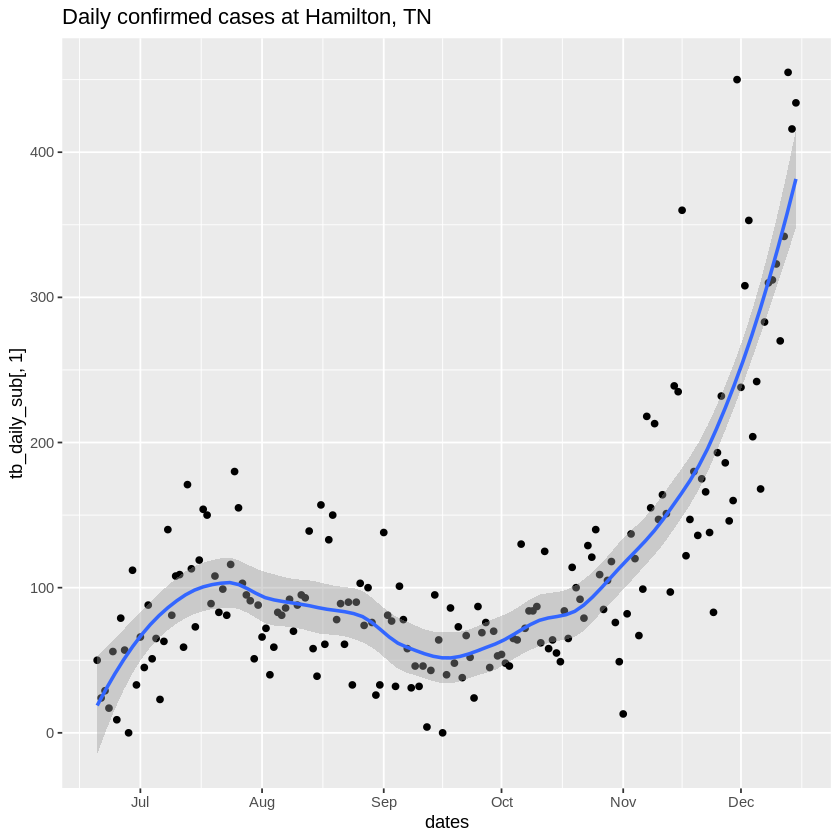

In [214]:
ggplot(tb_daily_sub, aes(x=dates, y= tb_daily_sub[,1] )) +
  geom_point() +
  stat_smooth(span=0.4) +
  ggtitle("Daily confirmed cases at Hamilton, TN")

### Can we remove some noises in Rt? (in progress)

In [215]:
tb_daily_sub$index = 1: length( tb_daily_sub[,1]) 

loessSpan04 = loess( RtHamilton ~ index, data=tb_daily_sub, span=0.4 )

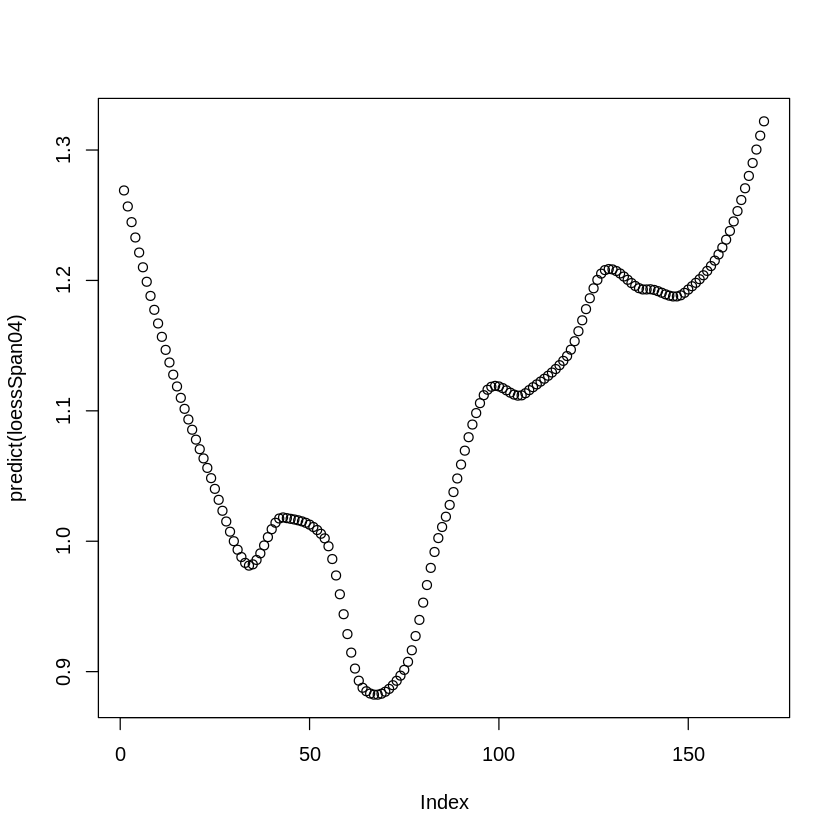

In [216]:
plot( predict( loessSpan04))

In [217]:
#str(loessSpan04)

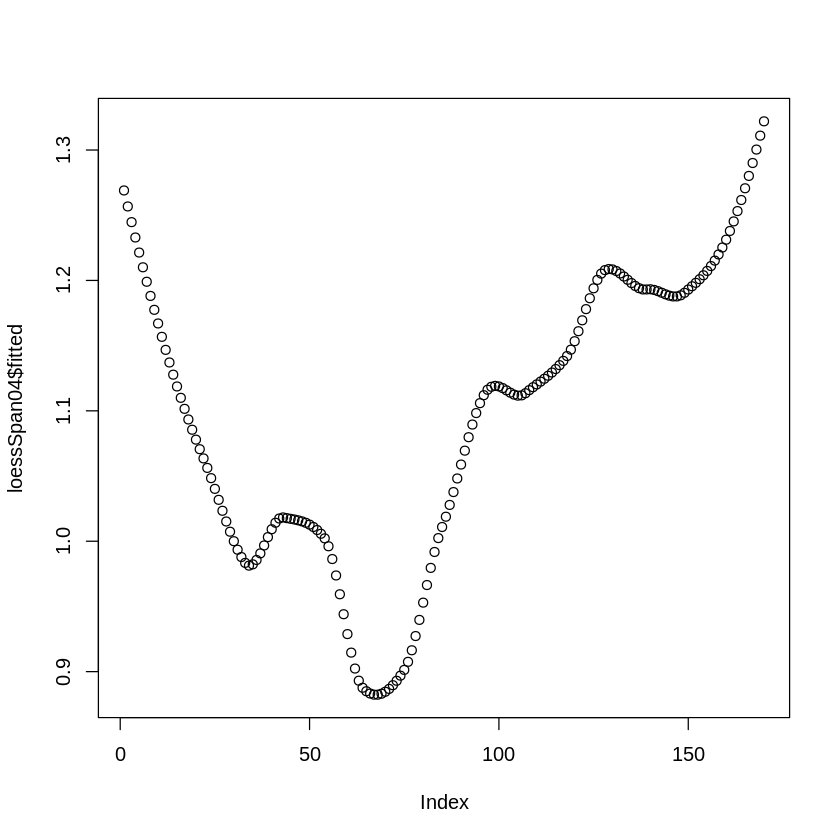

In [218]:
plot(loessSpan04$fitted)

# Chapter 9 (Optional) Global Daily cases 

In [221]:
library(tidyverse)
library(lubridate)
# load JHU covid19 data set with tidyverse read_csv
gtb = read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

head(gtb)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  `Province/State` = col_character(),
  `Country/Region` = col_character()
)
ℹ Use `spec()` for the full column specifications.




Province/State Country/Region      Lat       Long      1/22/20 1/23/20
1 NA             Afghanistan          33.93911  67.70995 0       0      
2 NA             Albania              41.15330  20.16830 0       0      
3 NA             Algeria              28.03390   1.65960 0       0      
4 NA             Andorra              42.50630   1.52180 0       0      
5 NA             Angola              -11.20270  17.87390 0       0      
6 NA             Antigua and Barbuda  17.06080 -61.79640 0       0      
  1/24/20 1/25/20 1/26/20 1/27/20 ⋯ 12/6/20 12/7/20 12/8/20 12/9/20 12/10/20
1 0       0       0       0       ⋯ 47306   47516   47716   47851   48053   
2 0       0       0       0       ⋯ 42988   43683   44436   45188   46061   
3 0       0       0       0       ⋯ 88252   88825   89416   90014   90579   
4 0       0       0       0       ⋯  7050    7084    7127    7162    7190   
5 0       0       0       0       ⋯ 15591   15648   15729   15804   15925   
6 0       0       0       0       ⋯   144     146     146     146     146   
  12/11/20 12/12/20 12/13/20 12/14/20 12/15/20
1 48116    48229    48527    48718    48952   
2 46863    47742    48530    49191    50000   
3 91121    91638    92102    92597    93065   
4  7236     7288     7338     7382     7382   
5 16061    16161    16188    16277    16362   
6   147      148      148      148      148

In [222]:
head(gtb[, 5:length(gtb[1,])])

1/22/20 1/23/20 1/24/20 1/25/20 1/26/20 1/27/20 1/28/20 1/29/20 1/30/20
1 0       0       0       0       0       0       0       0       0      
2 0       0       0       0       0       0       0       0       0      
3 0       0       0       0       0       0       0       0       0      
4 0       0       0       0       0       0       0       0       0      
5 0       0       0       0       0       0       0       0       0      
6 0       0       0       0       0       0       0       0       0      
  1/31/20 ⋯ 12/6/20 12/7/20 12/8/20 12/9/20 12/10/20 12/11/20 12/12/20 12/13/20
1 0       ⋯ 47306   47516   47716   47851   48053    48116    48229    48527   
2 0       ⋯ 42988   43683   44436   45188   46061    46863    47742    48530   
3 0       ⋯ 88252   88825   89416   90014   90579    91121    91638    92102   
4 0       ⋯  7050    7084    7127    7162    7190     7236     7288     7338   
5 0       ⋯ 15591   15648   15729   15804   15925    16061    16161    16188   
6 0       ⋯   144     146     146     146     146      147      148      148   
  12/14/20 12/15/20
1 48718    48952   
2 49191    50000   
3 92597    93065   
4  7382     7382   
5 16277    16362   
6   148      148

In [223]:
g_cumulative = data.frame( apply( gtb[,5:length(gtb[1,])], 2, sum ))
str(g_cumulative)
head(g_cumulative)

'data.frame':	329 obs. of  1 variable:
 $ apply.gtb...5.length.gtb.1.......2..sum.: num  555 654 941 1434 2118 ...


apply.gtb...5.length.gtb.1.......2..sum.
1/22/20  555                                    
1/23/20  654                                    
1/24/20  941                                    
1/25/20 1434                                    
1/26/20 2118                                    
1/27/20 2927

In [224]:
g_cummulative2= g_cumulative
g_cummulative2$Dates =  mdy(row.names(g_cummulative2))
names( g_cummulative2 ) = c("Daily_cases", "Dates")
head( g_cummulative2)

Daily_cases Dates     
1/22/20  555        2020-01-22
1/23/20  654        2020-01-23
1/24/20  941        2020-01-24
1/25/20 1434        2020-01-25
1/26/20 2118        2020-01-26
1/27/20 2927        2020-01-27

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



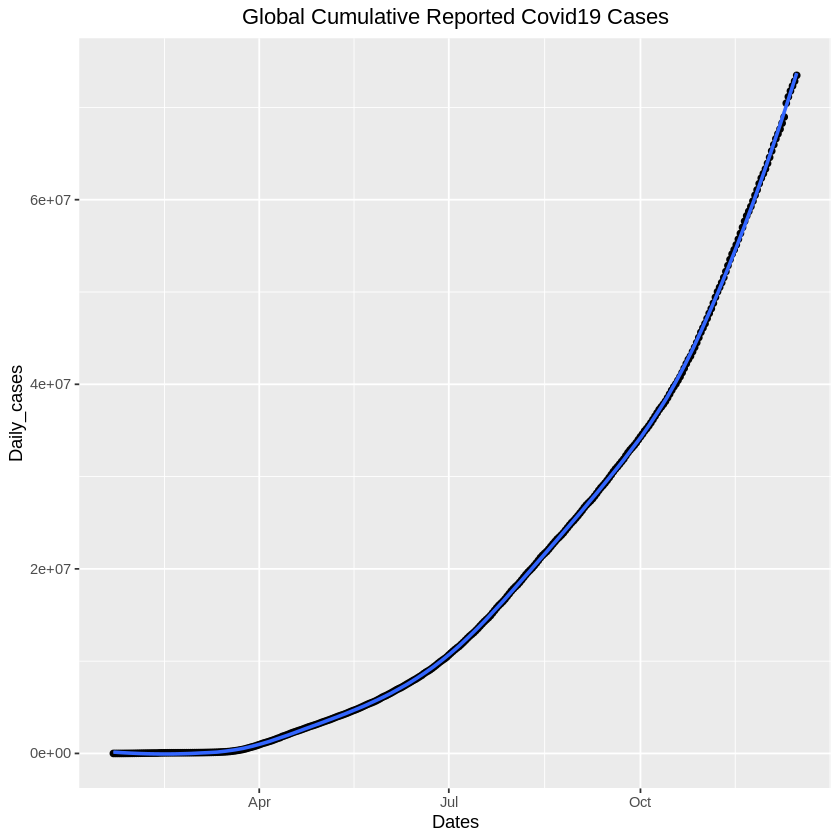

In [225]:
ggplot( g_cummulative2, aes(x=Dates, y=Daily_cases)) + geom_point() + stat_smooth(span=0.3) + ggtitle("Global Cumulative Reported Covid19 Cases") + theme(plot.title=element_text(hjust=0.5))

In [226]:
g_daily = data.frame(apply(g_cumulative, 2, diff))
g_daily$date = mdy(row.names(g_daily))
names(g_daily) = c("Daily_cases", "Dates")
head(g_daily)

Daily_cases Dates     
1/23/20   99        2020-01-23
1/24/20  287        2020-01-24
1/25/20  493        2020-01-25
1/26/20  684        2020-01-26
1/27/20  809        2020-01-27
1/28/20 2651        2020-01-28

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



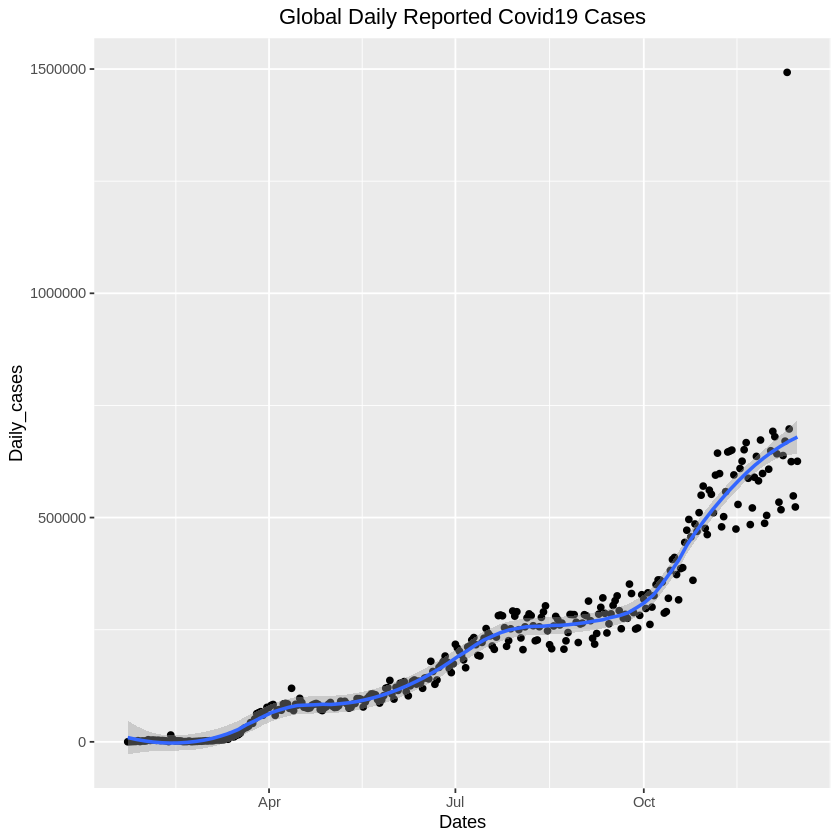

In [227]:
ggplot( g_daily, aes(x=Dates, y=Daily_cases)) + geom_point() + stat_smooth(span=0.3) + ggtitle("Global Daily Reported Covid19 Cases") + theme(plot.title=element_text(hjust=0.5))

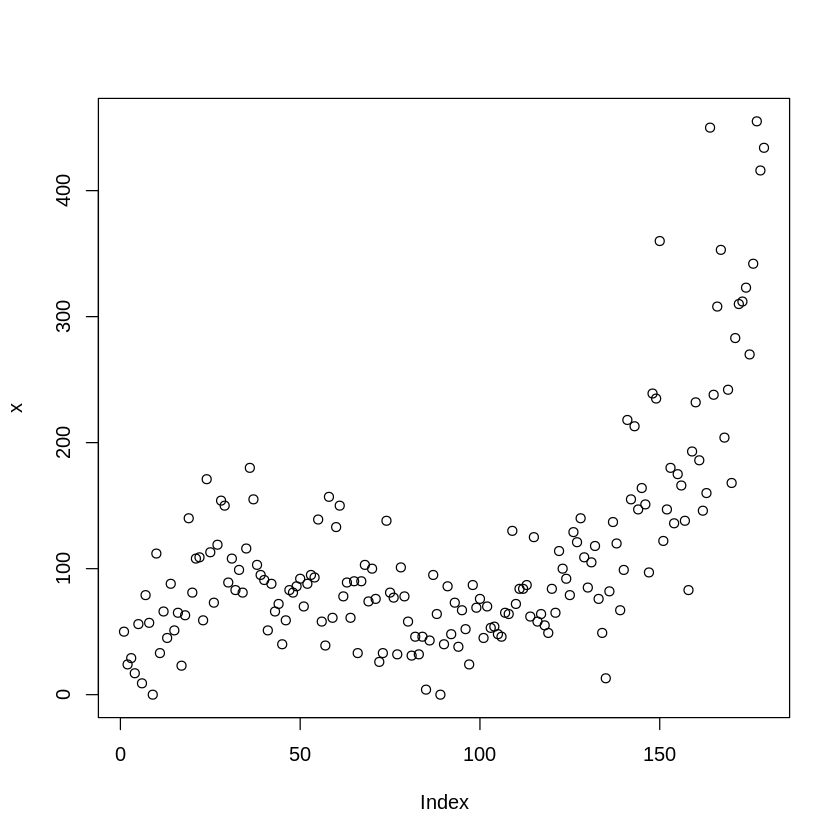

In [233]:
plot(x)

# Chapter 10 (Optional). Canada Covid19 data analysis

### pre-process

In [234]:
library(tidyverse)
library(lubridate)
# load JHU covid19 data set with tidyverse read_csv
gtb = read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

head(gtb)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  `Province/State` = col_character(),
  `Country/Region` = col_character()
)
ℹ Use `spec()` for the full column specifications.




Province/State Country/Region      Lat       Long      1/22/20 1/23/20
1 NA             Afghanistan          33.93911  67.70995 0       0      
2 NA             Albania              41.15330  20.16830 0       0      
3 NA             Algeria              28.03390   1.65960 0       0      
4 NA             Andorra              42.50630   1.52180 0       0      
5 NA             Angola              -11.20270  17.87390 0       0      
6 NA             Antigua and Barbuda  17.06080 -61.79640 0       0      
  1/24/20 1/25/20 1/26/20 1/27/20 ⋯ 12/6/20 12/7/20 12/8/20 12/9/20 12/10/20
1 0       0       0       0       ⋯ 47306   47516   47716   47851   48053   
2 0       0       0       0       ⋯ 42988   43683   44436   45188   46061   
3 0       0       0       0       ⋯ 88252   88825   89416   90014   90579   
4 0       0       0       0       ⋯  7050    7084    7127    7162    7190   
5 0       0       0       0       ⋯ 15591   15648   15729   15804   15925   
6 0       0       0       0       ⋯   144     146     146     146     146   
  12/11/20 12/12/20 12/13/20 12/14/20 12/15/20
1 48116    48229    48527    48718    48952   
2 46863    47742    48530    49191    50000   
3 91121    91638    92102    92597    93065   
4  7236     7288     7338     7382     7382   
5 16061    16161    16188    16277    16362   
6   147      148      148      148      148

In [235]:
names(gtb)[1:2] = c("Province", "Country")
head(gtb)

Province Country             Lat       Long      1/22/20 1/23/20 1/24/20
1 NA       Afghanistan          33.93911  67.70995 0       0       0      
2 NA       Albania              41.15330  20.16830 0       0       0      
3 NA       Algeria              28.03390   1.65960 0       0       0      
4 NA       Andorra              42.50630   1.52180 0       0       0      
5 NA       Angola              -11.20270  17.87390 0       0       0      
6 NA       Antigua and Barbuda  17.06080 -61.79640 0       0       0      
  1/25/20 1/26/20 1/27/20 ⋯ 12/6/20 12/7/20 12/8/20 12/9/20 12/10/20 12/11/20
1 0       0       0       ⋯ 47306   47516   47716   47851   48053    48116   
2 0       0       0       ⋯ 42988   43683   44436   45188   46061    46863   
3 0       0       0       ⋯ 88252   88825   89416   90014   90579    91121   
4 0       0       0       ⋯  7050    7084    7127    7162    7190     7236   
5 0       0       0       ⋯ 15591   15648   15729   15804   15925    16061   
6 0       0       0       ⋯   144     146     146     146     146      147   
  12/12/20 12/13/20 12/14/20 12/15/20
1 48229    48527    48718    48952   
2 47742    48530    49191    50000   
3 91638    92102    92597    93065   
4  7288     7338     7382     7382   
5 16161    16188    16277    16362   
6   148      148      148      148

In [236]:
ctb <- gtb %>% 
 filter( gtb$Country == 'Canada')

head(ctb)

Province         Country Lat     Long      1/22/20 1/23/20 1/24/20 1/25/20
1 Alberta          Canada  53.9333 -116.5765 0       0       0       0      
2 British Columbia Canada  53.7267 -127.6476 0       0       0       0      
3 Diamond Princess Canada   0.0000    0.0000 0       0       0       0      
4 Grand Princess   Canada   0.0000    0.0000 0       0       0       0      
5 Manitoba         Canada  53.7609  -98.8139 0       0       0       0      
6 New Brunswick    Canada  46.5653  -66.4619 0       0       0       0      
  1/26/20 1/27/20 ⋯ 12/6/20 12/7/20 12/8/20 12/9/20 12/10/20 12/11/20 12/12/20
1 0       0       ⋯ 68566   70301   72028   73488   75054    76792    78382   
2 0       0       ⋯ 36132   38152   38718   39337   40060    40797    40797   
3 0       0       ⋯     0       0       0       0       0        0        0   
4 0       0       ⋯    13      13      13      13      13       13       13   
5 0       0       ⋯ 18806   19131   19376   19655   19947    20392    20750   
6 0       0       ⋯   534     536     541     542     546      554      555   
  12/13/20 12/14/20 12/15/20
1 80099    81986    83327   
2 40797    42943    43463   
3     0        0        0   
4    13       13       13   
5 21023    21264    21535   
6   557      558      559

In [237]:
ctb1 <- ctb %>% dplyr::select(5:length(ctb[1,])) %>% as.matrix()
ctb1 = as.data.frame(t(ctb1))
head(ctb1)

V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16
1/22/20 0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0  
1/23/20 0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0  
1/24/20 0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0  
1/25/20 0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0  
1/26/20 0  0  0  0  0  0  0  0  0  0   1   0   0   0   0   0  
1/27/20 0  0  0  0  0  0  0  0  0  0   1   0   0   0   0   0

In [238]:
names(ctb1) = ctb$Province
ctb1 = ctb1[ -c(1:50), ] #remove first 50 rows with very low numbers
head(ctb1)

Alberta British Columbia Diamond Princess Grand Princess Manitoba
3/12/20 19       46              0                0              0       
3/13/20 29       64              0                2              4       
3/14/20 29       64              0                2              4       
3/15/20 39       73              0                2              4       
3/16/20 56      103              0                2              7       
3/17/20 74      103              0                8              8       
        New Brunswick Newfoundland and Labrador Northwest Territories
3/12/20 1             0                         0                    
3/13/20 1             0                         0                    
3/14/20 1             0                         0                    
3/15/20 2             1                         0                    
3/16/20 6             1                         0                    
3/17/20 8             3                         0                    
        Nova Scotia Nunavut Ontario Prince Edward Island Quebec
3/12/20 0           0        42     0                     9    
3/13/20 0           0        74     0                    17    
3/14/20 0           0        79     0                    17    
3/15/20 0           0       104     1                    24    
3/16/20 5           0       177     1                    50    
3/17/20 7           0       185     1                    74    
        Repatriated Travellers Saskatchewan Yukon
3/12/20 0                      0            0    
3/13/20 0                      2            0    
3/14/20 0                      2            0    
3/15/20 0                      2            0    
3/16/20 0                      7            0    
3/17/20 0                      7            0

## Convert cumulative values into daily new cases

In [239]:
ctb2 = data.frame(apply(ctb1, 2, diff))
head(ctb2)

Alberta British.Columbia Diamond.Princess Grand.Princess Manitoba
3/13/20 10      18               0                2              4       
3/14/20  0       0               0                0              0       
3/15/20 10       9               0                0              0       
3/16/20 17      30               0                0              3       
3/17/20 18       0               0                6              1       
3/18/20 23      83               0                1              7       
        New.Brunswick Newfoundland.and.Labrador Northwest.Territories
3/13/20 0             0                         0                    
3/14/20 0             0                         0                    
3/15/20 1             1                         0                    
3/16/20 4             0                         0                    
3/17/20 2             2                         0                    
3/18/20 3             0                         0                    
        Nova.Scotia Nunavut Ontario Prince.Edward.Island Quebec
3/13/20 0           0       32      0                     8    
3/14/20 0           0        5      0                     0    
3/15/20 0           0       25      1                     7    
3/16/20 5           0       73      0                    26    
3/17/20 2           0        8      0                    24    
3/18/20 5           0       36      0                    20    
        Repatriated.Travellers Saskatchewan Yukon
3/13/20 0                      2            0    
3/14/20 0                      0            0    
3/15/20 0                      0            0    
3/16/20 0                      5            0    
3/17/20 0                      0            0    
3/18/20 0                      1            0

In [240]:
current_dates = row.names(ctb2)
ctb2$dates = mdy(current_dates)
head(ctb2)

Alberta British.Columbia Diamond.Princess Grand.Princess Manitoba
3/13/20 10      18               0                2              4       
3/14/20  0       0               0                0              0       
3/15/20 10       9               0                0              0       
3/16/20 17      30               0                0              3       
3/17/20 18       0               0                6              1       
3/18/20 23      83               0                1              7       
        New.Brunswick Newfoundland.and.Labrador Northwest.Territories
3/13/20 0             0                         0                    
3/14/20 0             0                         0                    
3/15/20 1             1                         0                    
3/16/20 4             0                         0                    
3/17/20 2             2                         0                    
3/18/20 3             0                         0                    
        Nova.Scotia Nunavut Ontario Prince.Edward.Island Quebec
3/13/20 0           0       32      0                     8    
3/14/20 0           0        5      0                     0    
3/15/20 0           0       25      1                     7    
3/16/20 5           0       73      0                    26    
3/17/20 2           0        8      0                    24    
3/18/20 5           0       36      0                    20    
        Repatriated.Travellers Saskatchewan Yukon dates     
3/13/20 0                      2            0     2020-03-13
3/14/20 0                      0            0     2020-03-14
3/15/20 0                      0            0     2020-03-15
3/16/20 0                      5            0     2020-03-16
3/17/20 0                      0            0     2020-03-17
3/18/20 0                      1            0     2020-03-18

In [241]:
#myprovinces = c('Alberta','British.Columbia', 'Ontario')
myprovinces = c('Alberta','Ontario')

days_window = 150 # time window
endday = today(tzone = 'EST') -1

tb_sub <- ctb2 %>% 
  dplyr::select( all_of(myprovinces), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

tail(tb_sub)

Alberta Ontario dates     
12/10/20 1566    1930    2020-12-10
12/11/20 1738    1791    2020-12-11
12/12/20 1590    1851    2020-12-12
12/13/20 1717    1702    2020-12-13
12/14/20 1887    2194    2020-12-14
12/15/20 1341    2166    2020-12-15

In [242]:
install.packages('reshape2')
library(reshape2)
df_tmp <- reshape2::melt(tb_sub, measure.vars = myprovinces, value.name = 'DailyCases', variable.name = 'State')
head(df_tmp)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



dates      State   DailyCases
1 2020-07-18 Alberta   0       
2 2020-07-19 Alberta   0       
3 2020-07-20 Alberta 368       
4 2020-07-21 Alberta 141       
5 2020-07-22 Alberta   0       
6 2020-07-23 Alberta 247

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



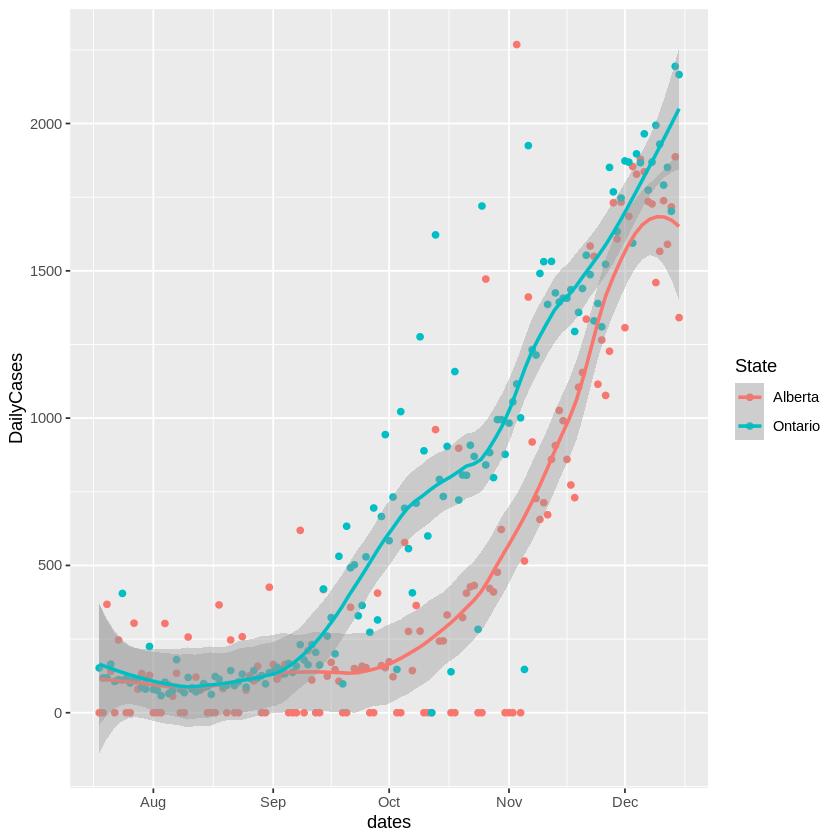

In [243]:
ggplot(df_tmp, aes(x=dates, y=DailyCases,color=State)) + geom_point() + stat_smooth(span=0.3)

## Estimate Rt

In [244]:
install.packages('R0')
install.packages('reshape2')

library('R0')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [245]:
str(tb_sub)

'data.frame':	151 obs. of  3 variables:
 $ Alberta: num  0 0 368 141 0 247 111 0 0 304 ...
 $ Ontario: num  152 118 119 165 106 112 405 116 101 115 ...
 $ dates  : Date, format: "2020-07-18" "2020-07-19" ...


In [246]:
mGT<-generation.time("gamma", c(5, 1.5))
tmp = tb_sub[,2] #Ontario
tmp[tmp<0] = 0
TD <- est.R0.TD(tmp, mGT, begin=1, end=length(tmp)-1+1, nsim=100)
tb_sub$RtOntario = TD$R


Warning message in est.R0.TD(tmp, mGT, begin = 1, end = length(tmp) - 1 + 1, nsim = 100):
“Accurate confidence interval for R(t) requires a large number of simulations. Consider increasing 'nsim'”
Warning message in est.R0.TD(tmp, mGT, begin = 1, end = length(tmp) - 1 + 1, nsim = 100):
“Using initial incidence as initial number of cases.”


In [247]:
tmp = tb_sub[,1] #Alberta
tmp[tmp<0] = 0
TD <- est.R0.TD(tmp, mGT, begin=1, end=length(tmp)-1+1, nsim=100)
tb_sub$RtAlberta = TD$R


Warning message in est.R0.TD(tmp, mGT, begin = 1, end = length(tmp) - 1 + 1, nsim = 100):
“Accurate confidence interval for R(t) requires a large number of simulations. Consider increasing 'nsim'”
Warning message in est.R0.TD(tmp, mGT, begin = 1, end = length(tmp) - 1 + 1, nsim = 100):
“Using initial incidence as initial number of cases.”


ERROR: ignored

In [ ]:
tail(tb_sub)

In [ ]:
df_tmp <- reshape2::melt(tb_sub[, 3:5], measure.vars = c("RtOntario", "RtAlberta"), value.name = 'Rt', variable.name = 'Rt_by_State')
df_tmp$Rt[ df_tmp$Rt==0] = NA
tail(df_tmp)


In [ ]:
ggplot(df_tmp, aes(x=dates, y=log10(Rt), color=Rt_by_State) ) +
  geom_point() +
  stat_smooth(span=0.3)

# Sandbox

In [ ]:
x <- runif(12,1,1.5)
y <- runif(12,1,1.5)
z <- runif(12,1,1.5)
m <- letters[1:12]
df <- data.frame(x,y,z,m)


In [ ]:
#library(tidyverse)
#install.packages('reshape2')
library(reshape2)
library(ggplot2)
#when you melt essentially you create only one column with the value
#and one column with the variable i.e. your x,y,z 
df <- melt(df, id.vars='m')
head(df)

In [ ]:
ggplot(df, aes(x=variable, y=value, fill=m)) + geom_bar(stat = 'identity')

In [ ]:
#ggplot it. x axis will be m, y will be the value and fill will be
#essentially your x,y,z

ggplot(df, aes(x=m, y=value, fill=variable)) + geom_bar(stat='identity')

## git clone? 

In [ ]:
system("git clone https://github.com/hongqin/Use-R-in-CoLab.git")
system("ls")

In [ ]:
system( "ls /content")